# PROJET INTRO DATA SCIENCE 2024-2025

  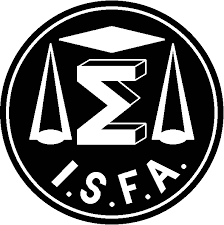

***Membres du groupe*** :
- D'ALMEIDA Dedekpesse Komivi , M1 Actuariat
- MELI KOUYEM Frege , M1 Actuariat
- KOUAME Christ Ange Dylan , M1 Actuariat

Nous souhaitons exprimer notre sincère gratitude à **Mr A.COULOUMY** pour cette opportunité d’approfondir nos connaissances en Data Science à travers un projet concret.  

Ce travail nous a permis d’appliquer les concepts étudiés en cours, de relever des défis pratiques et de renforcer notre compréhension des méthodes d’analyse et de traitement des données. Nous avons donné le meilleur de nous-mêmes pour mener à bien cette étude et en tirer le maximum d’enseignements.  

***Merci encore pour votre encadrement et vos précieux conseils tout au long de ce projet***.  





Tout d'abord nous commençons par charger les différentes librairies nécessaires pour les différentes analyses futures , en s'assurant d'installer préalablement la bibliothèque ***CatBoost*** (qui est un algorithme de gradient boosting optimisé pour fonctionner avec des données catégorielles ) et en mettant à jour ***Scikit-Learn*** et ***XGBoost*** , qui nous seront très utiles.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from io import StringIO
import plotly.express as px
import plotly.graph_objects as go
from math import ceil
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import time
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, cross_validate
import warnings
warnings.filterwarnings('ignore')

Le bloc de code suivant met en place des outils de ***traitement du langage naturel (NLP)***  en utilisant ***NLTK et Gensim*** , deux bibliothèques Python très populaires pour l’analyse de texte.
Ces bibliothèques nous seront d'une grande utilité pour le traitement de la variable catégorielle ***DESCRIPTION*** de la base de données qu'on aura l'occasion de voir.

In [5]:
import nltk
import string
import gensim
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt_tab')
stops = set(stopwords.words('english')) #On Convertit la liste des stopwords en un ensemble (set) pour accélérer la recherche et suppression des mots inutiles dans un texte.
# Téléchargement des ressources nécessaires
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

Ensuite , nous allons télécharger un modèle depuis la bibilothèque **gensim.models** , ***Word2Vec*** pré-entraîné depuis Google Drive et  l’utiliser pour analyser des similarités entre mots.
Il nous permettra notamment de traiter la séverité au niveau de la description des sinistres.

La bibilothèque **gdown** permet de télécharger des fichiers depuis Google Drive via leur ID de fichier.

In [6]:
import gdown
import gensim.models

# ID du fichier Google Drive
file_id = "1Majnn0vVv-FrKv5onHuC8bn9V9LXsKdw"
url = f"https://drive.google.com/uc?id={file_id}"

# Nom du fichier local après téléchargement
output = "GoogleNews-vectors-negative300.bin.gz"

# Télécharger le fichier
gdown.download(url, output, quiet=False)

# Charger le modèle Word2Vec
model = gensim.models.KeyedVectors.load_word2vec_format(output, binary=True)

# Exemple d'utilisation
print(model.most_similar('king'))


Downloading...
From (original): https://drive.google.com/uc?id=1Majnn0vVv-FrKv5onHuC8bn9V9LXsKdw
From (redirected): https://drive.google.com/uc?id=1Majnn0vVv-FrKv5onHuC8bn9V9LXsKdw&confirm=t&uuid=a3e54f87-0698-449d-b9e2-bec3742258f6
To: C:\Users\chris\Downloads\GoogleNews-vectors-negative300.bin.gz
100%|█████████████████████████████████████████████████████████████████████████████| 1.65G/1.65G [01:09<00:00, 23.7MB/s]


[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]



On charge maintenant la base de données sous forme de fichier Excel en prenant soin de séparer la feuille "test" de la feuille "train" dans  deux  data_frames distincts.

Importation des données

In [8]:
url = 'https://docs.google.com/spreadsheets/d/1-_4oiniLKgZqz1UD2viHe2KDASyoqi0v/edit?usp=sharing&ouid=113163292186711751518&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_train = pd.read_excel(path, sheet_name='train')
df_test = pd.read_excel(path, sheet_name='test')


On vérifie maintenant que les données ont été correctement chargées en verifiant les dimensions de la base de données et en affichant les premières lignes avec la commande  **df_train.head()**.

In [9]:
df_train.shape

(45672, 16)

Le dataframe importé contient 45 672 observations et 16 variables

In [10]:
df_train.head()

Identifiant         date_accident    date_communication  age sexe  \
0    W0005163  1990-09-08T23:00:00Z  1990-09-26T00:00:00Z   31    M   
1    W0008118  2001-03-23T10:00:00Z  2001-06-22T00:00:00Z   36    M   
2    W0010110  2000-07-11T10:00:00Z  2000-12-19T00:00:00Z   55    M   
3    W0012404  1988-11-07T11:00:00Z  1988-11-13T00:00:00Z   42    M   
4    W0013347  1988-11-14T15:00:00Z  1988-11-17T00:00:00Z   34    M   

  status_marital  enfants  autre_dep  salaire_semaine  patrimoine type_emploi  \
0              M        3          3           573.31    478075.0           F   
1              M        0          3           673.00    883302.0           F   
2              M        0          3          1442.31         NaN           F   
3              M        2          3           610.54         NaN           F   
4              M        2          3           307.00         NaN           F   

   heure_par_semaine  jour_par_semaine  \
0               42.0                 3   
1               38.0                 5   
2               40.0                 5   
3               40.0                 5   
4               40.0                 5   

                                      description  cout_init   cout_ultime  
0     GETTING INTO MACHINE CUT MIDDLE LEFT FINGER       1700   1490.769783  
1           UNSPECIFIED STRAINED LEFT KNEE INJURY      35000  29739.029390  
2                        SLIPPED DOWN STAIRS BACK      15000  18907.561660  
3  STRUCK HAMMER SKIN LOSS AND BLISTER AND FINGER       1000   1264.628466  
4           STACKING CARTONS PAIN LOWER BACK PAIN        630   2052.675809

Suppression de  variables jugées inutiles dans un processus de prédiction de coûts liés à des sinistres.

In [11]:
data = df_train.drop(columns='Identifiant', axis=1)

Visualisation des valeurs manquantes

In [12]:
print(f'Nombre de valeur manquante dans toute la dataframe : {data.isnull().sum().sum()}')

Nombre de valeur manquante dans toute la dataframe : 37370


In [13]:
print(f'Pourcentage de valeur manquante par variable : \n{data.isnull().sum()/data.shape[0]}')

Pourcentage de valeur manquante par variable : 
date_accident         0.000000
date_communication    0.000000
age                   0.000000
sexe                  0.000000
status_marital        0.000525
enfants               0.000000
autre_dep             0.000000
salaire_semaine       0.000000
patrimoine            0.817700
type_emploi           0.000000
heure_par_semaine     0.000000
jour_par_semaine      0.000000
description           0.000000
cout_init             0.000000
cout_ultime           0.000000
dtype: float64


On constate que les variables contenant des valeurs manquantes sont 'status_marital' et 'patrimoine'.

Le patrimoine ayant plus de 80% de valeurs manquantes, l'on decidera par la suite de s'en passer.

La proportion d'observation manquante dans 'status_marital' est de 0.00025 donc on peut se permettre de supprimer toutes les observations ayant des valeurs manquantes (24 obs.)

In [14]:
# Suppression de la variable patrimoine

data = data.drop(columns='patrimoine', axis=1)

In [15]:
# Suppression des observations ayant une NA dans status_marital
data = data.dropna(axis=0)

In [16]:
# Revérification des valeurs manquantes

print(f'Valeur manquante dans le jeu de donnée : {data.isnull().sum().sum()}')

Valeur manquante dans le jeu de donnée : 0


Nouvelles dimensions de la table actualisée.

In [17]:
print(data.shape)
data = data.reset_index(drop=True)
data

(45648, 14)


date_accident    date_communication  age sexe status_marital  \
0      1990-09-08T23:00:00Z  1990-09-26T00:00:00Z   31    M              M   
1      2001-03-23T10:00:00Z  2001-06-22T00:00:00Z   36    M              M   
2      2000-07-11T10:00:00Z  2000-12-19T00:00:00Z   55    M              M   
3      1988-11-07T11:00:00Z  1988-11-13T00:00:00Z   42    M              M   
4      1988-11-14T15:00:00Z  1988-11-17T00:00:00Z   34    M              M   
...                     ...                   ...  ...  ...            ...   
45643  1994-08-12T11:00:00Z  1994-09-15T00:00:00Z   50    M              M   
45644  1996-11-21T14:00:00Z  1997-01-25T00:00:00Z   32    M              S   
45645  1989-03-14T09:00:00Z  1989-04-11T00:00:00Z   30    M              S   
45646  2004-09-22T15:00:00Z  2004-10-02T00:00:00Z   40    M              S   
45647  1998-09-29T10:00:00Z  1998-11-05T00:00:00Z   30    M              S   

       enfants  autre_dep  salaire_semaine type_emploi  heure_par_semaine  \
0            3          3           573.31           F               42.0   
1            0          3           673.00           F               38.0   
2            0          3          1442.31           F               40.0   
3            2          3           610.54           F               40.0   
4            2          3           307.00           F               40.0   
...        ...        ...              ...         ...                ...   
45643        2          0           696.05           F               38.0   
45644        0          0           200.00           F               38.0   
45645        0          0           615.38           F               38.0   
45646        2          0           561.26           F               38.0   
45647        0          0           200.00           F               38.0   

       jour_par_semaine                                        description  \
0                     3        GETTING INTO MACHINE CUT MIDDLE LEFT FINGER   
1                     5              UNSPECIFIED STRAINED LEFT KNEE INJURY   
2                     5                           SLIPPED DOWN STAIRS BACK   
3                     5     STRUCK HAMMER SKIN LOSS AND BLISTER AND FINGER   
4                     5              STACKING CARTONS PAIN LOWER BACK PAIN   
...                 ...                                                ...   
45643                 5              LIFTING BACK STRAIN LOWER BACK STRAIN   
45644                 5        STRUCK STOVE LACERATION RIGHT LOWER FOREARM   
45645                 5         FELL DOWN ON KNEE LEFT KNEE INJURY SWOLLEN   
45646                 5               LIFTED NETBALL HOOP NECK NECK STRAIN   
45647                 5  STRUCK METAL FROM SCREW GUN LACERATION LEFT MI...   

       cout_init   cout_ultime  
0           1700   1490.769783  
1          35000  29739.029390  
2          15000  18907.561660  
3           1000   1264.628466  
4            630   2052.675809  
...          ...           ...  
45643      11500   9785.507185  
45644       1000    440.635652  
45645       1500  12391.392090  
45646       9500   8483.748442  
45647        500    226.716683  

[45648 rows x 14 columns]

GESTION DES VARIABLES TEMPORELLES : on extrait des données précises des dates pour obtenir des données facilement utilisables dans la suite de l'étude.

In [18]:
# Gestion des variables temporelles

data['date_accident'] = pd.to_datetime(data['date_accident'])
data['date_communication'] = pd.to_datetime(data['date_communication'])

In [19]:
data['date_accident_year'] = data['date_accident'].dt.year
data['date_accident_month'] = data['date_accident'].dt.month
data['date_accident_day'] = data['date_accident'].dt.day
data['date_accident_dayofweek'] = data['date_accident'].dt.dayofweek

In [20]:
# Création d'une nouvelle variable representant le delai de communication

data['delai_communication'] = data['date_communication'] - data['date_accident']
data['delai_communication_day'] = data['delai_communication'].dt.days

Suppression des variables "date_accident" , "delai_communication" et "date_communication" pour éviter des effets de multicolinéarité dans nos modèles.

In [21]:
data = data.drop(columns='date_accident', axis=1)

In [22]:
data = data.drop(columns='delai_communication', axis=1)

In [23]:
data['delai_communication_day']

0         17
1         90
2        160
3          5
4          2
        ... 
45643     33
45644     64
45645     27
45646      9
45647     36
Name: delai_communication_day, Length: 45648, dtype: int64

In [24]:
# Suppression de la variable date_communication

data = data.drop(columns='date_communication', axis=1)

In [25]:
# Vérificaton des classes et types des variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45648 entries, 0 to 45647
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45648 non-null  int64  
 1   sexe                     45648 non-null  object 
 2   status_marital           45648 non-null  object 
 3   enfants                  45648 non-null  int64  
 4   autre_dep                45648 non-null  int64  
 5   salaire_semaine          45648 non-null  float64
 6   type_emploi              45648 non-null  object 
 7   heure_par_semaine        45648 non-null  float64
 8   jour_par_semaine         45648 non-null  int64  
 9   description              45648 non-null  object 
 10  cout_init                45648 non-null  int64  
 11  cout_ultime              45648 non-null  float64
 12  date_accident_year       45648 non-null  int32  
 13  date_accident_month      45648 non-null  int32  
 14  date_accident_day     

Etude statistique des variables pour réperer notamment de potentielles valeurs aberhantes.

In [26]:
# Etude statistique des variables

# Variable quantitative

data.describe().round(2).T

count      mean       std      min      25%  \
age                      45648.0     33.86     12.13    13.00    23.00   
enfants                  45648.0      0.12      0.52     0.00     0.00   
autre_dep                45648.0      0.01      0.11     0.00     0.00   
salaire_semaine          45648.0    416.59    248.48     1.00   200.00   
heure_par_semaine        45648.0     37.71     12.68     0.00    38.00   
jour_par_semaine         45648.0      4.90      0.56     1.00     5.00   
cout_init                45648.0   7865.52  20905.92     1.00   700.00   
cout_ultime              45648.0  11087.17  34357.88   121.89   930.08   
date_accident_year       45648.0   1996.51      5.19  1988.00  1992.00   
date_accident_month      45648.0      6.52      3.40     1.00     4.00   
date_accident_day        45648.0     15.66      8.77     1.00     8.00   
date_accident_dayofweek  45648.0      2.30      1.70     0.00     1.00   
delai_communication_day  45648.0     38.32     61.29    -1.00    13.00   

                             50%      75%         max  
age                        32.00    43.00       81.00  
enfants                     0.00     0.00        9.00  
autre_dep                   0.00     0.00        3.00  
salaire_semaine           392.92   500.00     7497.00  
heure_par_semaine          38.00    40.00      640.00  
jour_par_semaine            5.00     5.00        7.00  
cout_init                2000.00  9500.00  2000000.00  
cout_ultime              3388.37  8213.54  4027135.94  
date_accident_year       1997.00  2001.00     2005.00  
date_accident_month         7.00    10.00       12.00  
date_accident_day          16.00    23.00       31.00  
date_accident_dayofweek     2.00     4.00        6.00  
delai_communication_day    21.00    40.00     1090.00

In [27]:
data.describe(include='object').T

count unique                                          top  \
sexe            45648      3                                            M   
status_marital  45648      3                                            S   
type_emploi     45648      2                                            F   
description     45648  24714  SLIPPED ON ROLLER TENDONITIS RIGHT SHOULDER   

                 freq  
sexe            35181  
status_marital  22086  
type_emploi     41439  
description       241

VARIABLE COÛT ULTIME: on définit une variable "différence_cout" qui serait plus intéressant à regarder dans notre analyse.
on se dit que si l'objectif c'est de voir les coûts supplémentaires qui peuvent survenir, alors rejetter la différence de coût hord d'une certaine zone de confiance fait sens.

In [28]:
# Gestion du cout ultime
# Si on suppose que ultime - init ne peut depasser le quantile d'ordre 0.95 (pour avoir une zone de rejet à 5%) alors :

data['difference_cout'] = data['cout_ultime'] - data['cout_init']
borne_inf = data['difference_cout'].quantile(0)
borne_sup = data['difference_cout'].quantile(0.95)
data_outliers = data[(data['difference_cout'] > borne_sup) | (data['difference_cout'] < borne_inf)]
data = data[(data['difference_cout'] <= borne_sup) & (data['difference_cout'] >= borne_inf)]

In [29]:
borne_sup

17587.02279850002

In [30]:
borne_inf

-1912736.69511

In [31]:
data_outliers

age sexe status_marital  enfants  autre_dep  salaire_semaine  \
10      40    F              M        3          2           468.00   
30      29    M              M        3          1           660.00   
34      51    M              M        3          1          1087.00   
68      40    M              M        2          1           628.42   
75      21    M              S        0          1           672.91   
...    ...  ...            ...      ...        ...              ...   
45467   50    F              M        0          0           552.50   
45500   21    M              S        0          0           434.00   
45504   30    M              S        0          0           561.20   
45574   38    M              U        0          0           550.00   
45591   23    M              S        0          0           584.40   

      type_emploi  heure_par_semaine  jour_par_semaine  \
10              F               40.0                 5   
30              P               33.0                 4   
34              P               45.0                 5   
68              F               40.0                 5   
75              P               35.0                 5   
...           ...                ...               ...   
45467           P               30.0                 4   
45500           F               40.0                 5   
45504           F               40.0                 5   
45574           F               38.0                 5   
45591           F               38.0                 5   

                                             description  cout_init  \
10              LIFTING BOX LIGAMENT STRAIN IN RIGHT EYE      25000   
30                                  TWISTING BACK STRAIN      53500   
34     JARRED BACK WITH PULLED STRAINED MUSCLE LOWER ...      82514   
68                            HOT WATER BURNS RIGHT HAND       2200   
75                 LIFTING STEEL STRAINED RIGHT SHOULDER      15000   
...                                                  ...        ...   
45467                  PUSHING TROLLEY STRAIN RIGHT KNEE      30000   
45500          LIFTING FORMWORK STRAIN RIGHT HAND STRAIN       3300   
45504           STRUCK ON RIGHT FOOT FRACTURE LEFT WRIST      20000   
45574  LIFTING VINES LOWER BACK STRAIN LOWER BACK STRAIN       7000   
45591  TWISTED KNEE INJURY TO LOWER BACK SPRAIN BACK ...      25000   

        cout_ultime  date_accident_year  date_accident_month  \
10      72318.82699                1999                   12   
30     116324.67480                2005                    8   
34     127552.67270                2005                   10   
68      20042.91642                1988                    8   
75     138381.48450                1998                   10   
...             ...                 ...                  ...   
45467   53139.54869                2005                    2   
45500   28005.10086                1990                    7   
45504  129485.03870                2003                   11   
45574   54192.29147                1995                    8   
45591  183706.26120                2003                    4   

       date_accident_day  date_accident_dayofweek  delai_communication_day  \
10                    24                        4                      191   
30                    18                        3                       41   
34                     3                        0                       20   
68                    16                        1                        9   
75                     1                        3                       12   
...                  ...                      ...                      ...   
45467                 18                        4                       13   
45500                 24                        1                       15   
45504                 20                        3                       19   
45574                 25                        4      

Dans ce qui suit , on séparer les variables quantitatives et qualitatives pour la suite de l'analyse.
En effet pour les "quanti" on regardera plus la distribution sous forme de boxplot par exemple et pour les "quali" , on regardera plus la distribution sous forme de nombre d'occurence.

In [32]:
# Séparation des variables quanti et quali

data_num = data.select_dtypes(include='number')
data_cat = data.select_dtypes(include=['object', 'category'])

categorical_features = data_cat.columns.to_list()
numerical_features = data_num.columns.to_list()

In [33]:
# Comptage des modalités par variables qualitatives
for cat in categorical_features :
    print(data_cat[cat].value_counts())

sexe
M    33475
F     9888
U        2
Name: count, dtype: int64
status_marital
S    21193
M    18037
U     4135
Name: count, dtype: int64
type_emploi
F    39406
P     3959
Name: count, dtype: int64
description
SLIPPED ON ROLLER TENDONITIS RIGHT SHOULDER                   219
SORTING ALUMINIUM BARS STRAIN SHOULDER NECK                   215
SLIPPED USING LATHE IN EYE CORNEA                             215
REDBACK SPIDER BITE RIGHT FOOT RIGHT FRACTURE                 209
LIFTING BACK STRAIN LOWER BACK STRAIN                         198
                                                             ... 
JARRED ONSET STRAIN LEFT FOOT BRUISED FOOT                      1
HIT HEAD ON DOOR BRUISED HEAD                                   1
STRUCK STANLEY KNIFE LACERATED LEFT LEG FELL ON HEAD SHOCK      1
SLIPPED OFF BEAM CRUSHED RIGHT LITTLE FINGER                    1
STRUCK METAL FROM SCREW GUN LACERATION LEFT MIDDLE FINGER       1
Name: count, Length: 23748, dtype: int64


In [34]:
# Distributiond pour les varaibles quali

def hist(df, discrete = True) -> None:

      n_cols = len(df.columns)
      n_rows = ceil(n_cols / 3)
      fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
      axes = axes.flatten()

      # Tracer les histogrammes
      for i, cat in enumerate(df):
         sns.histplot(data=df, x=cat, discrete=discrete, shrink=0.8, color='skyblue', ax=axes[i])
         axes[i].set_title(f"Distribution des modalités pour '{cat}'")
         axes[i].set_xlabel(cat)
         axes[i].set_ylabel('Nombre d\'occurrences')
         axes[i].tick_params(axis='x', rotation=45)  # Rotation des ticks pour les modalités

      # Supprimer les axes inutilisés si le nombre de colonnes est inférieur à la grille
      for j in range(i + 1, len(axes)):
         fig.delaxes(axes[j])

      # Ajustement de la mise en page
      plt.tight_layout()
      plt.show()

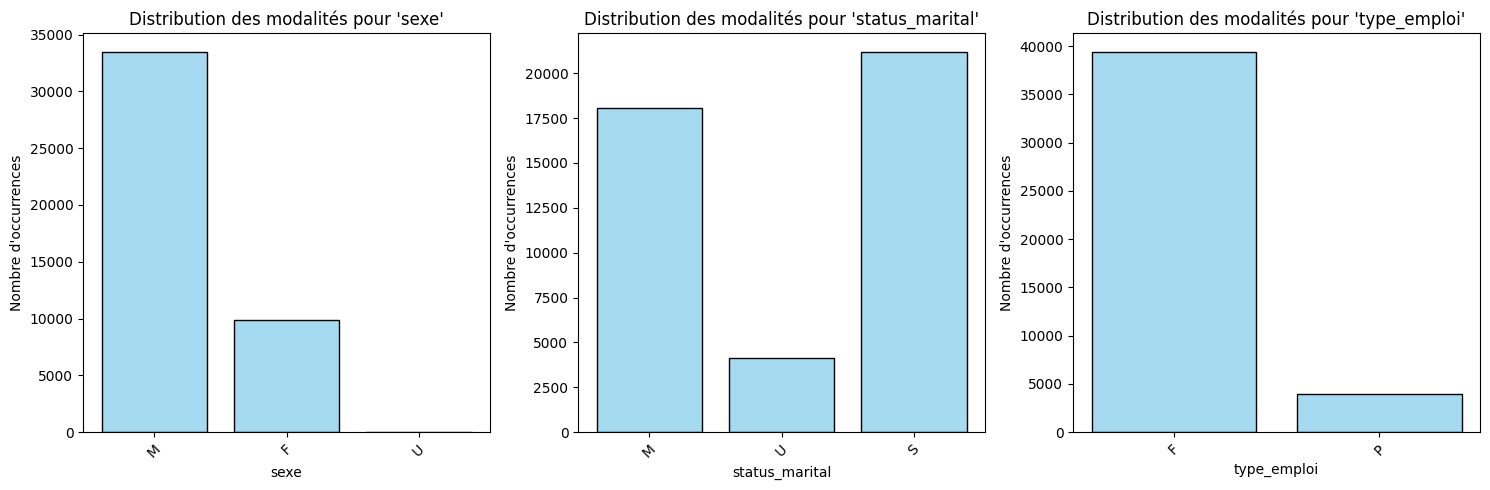

In [35]:
hist(data_cat.drop(columns='description', axis=1))

In [36]:
# Boxplot des variables quanti

def boxplot(numeric_data) -> None:
      n_cols = len(numeric_data.columns)
      n_rows = ceil(n_cols / 3)

      fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
      axes = axes.flatten()  # Aplatir les axes pour itérer facilement

      for i, col in enumerate(numeric_data.columns):
         sns.boxplot(y=numeric_data[col], ax=axes[i])
         axes[i].set_title(f"{col}")
         axes[i].set_ylabel("Valeurs")
         axes[i].set_xlabel("")  # Pas d'étiquette pour l'axe X

      # Supprimer les axes inutilisés si le nombre de colonnes est inférieur à la grille
      for j in range(i + 1, len(axes)):
         fig.delaxes(axes[j])

      plt.tight_layout()
      plt.show()

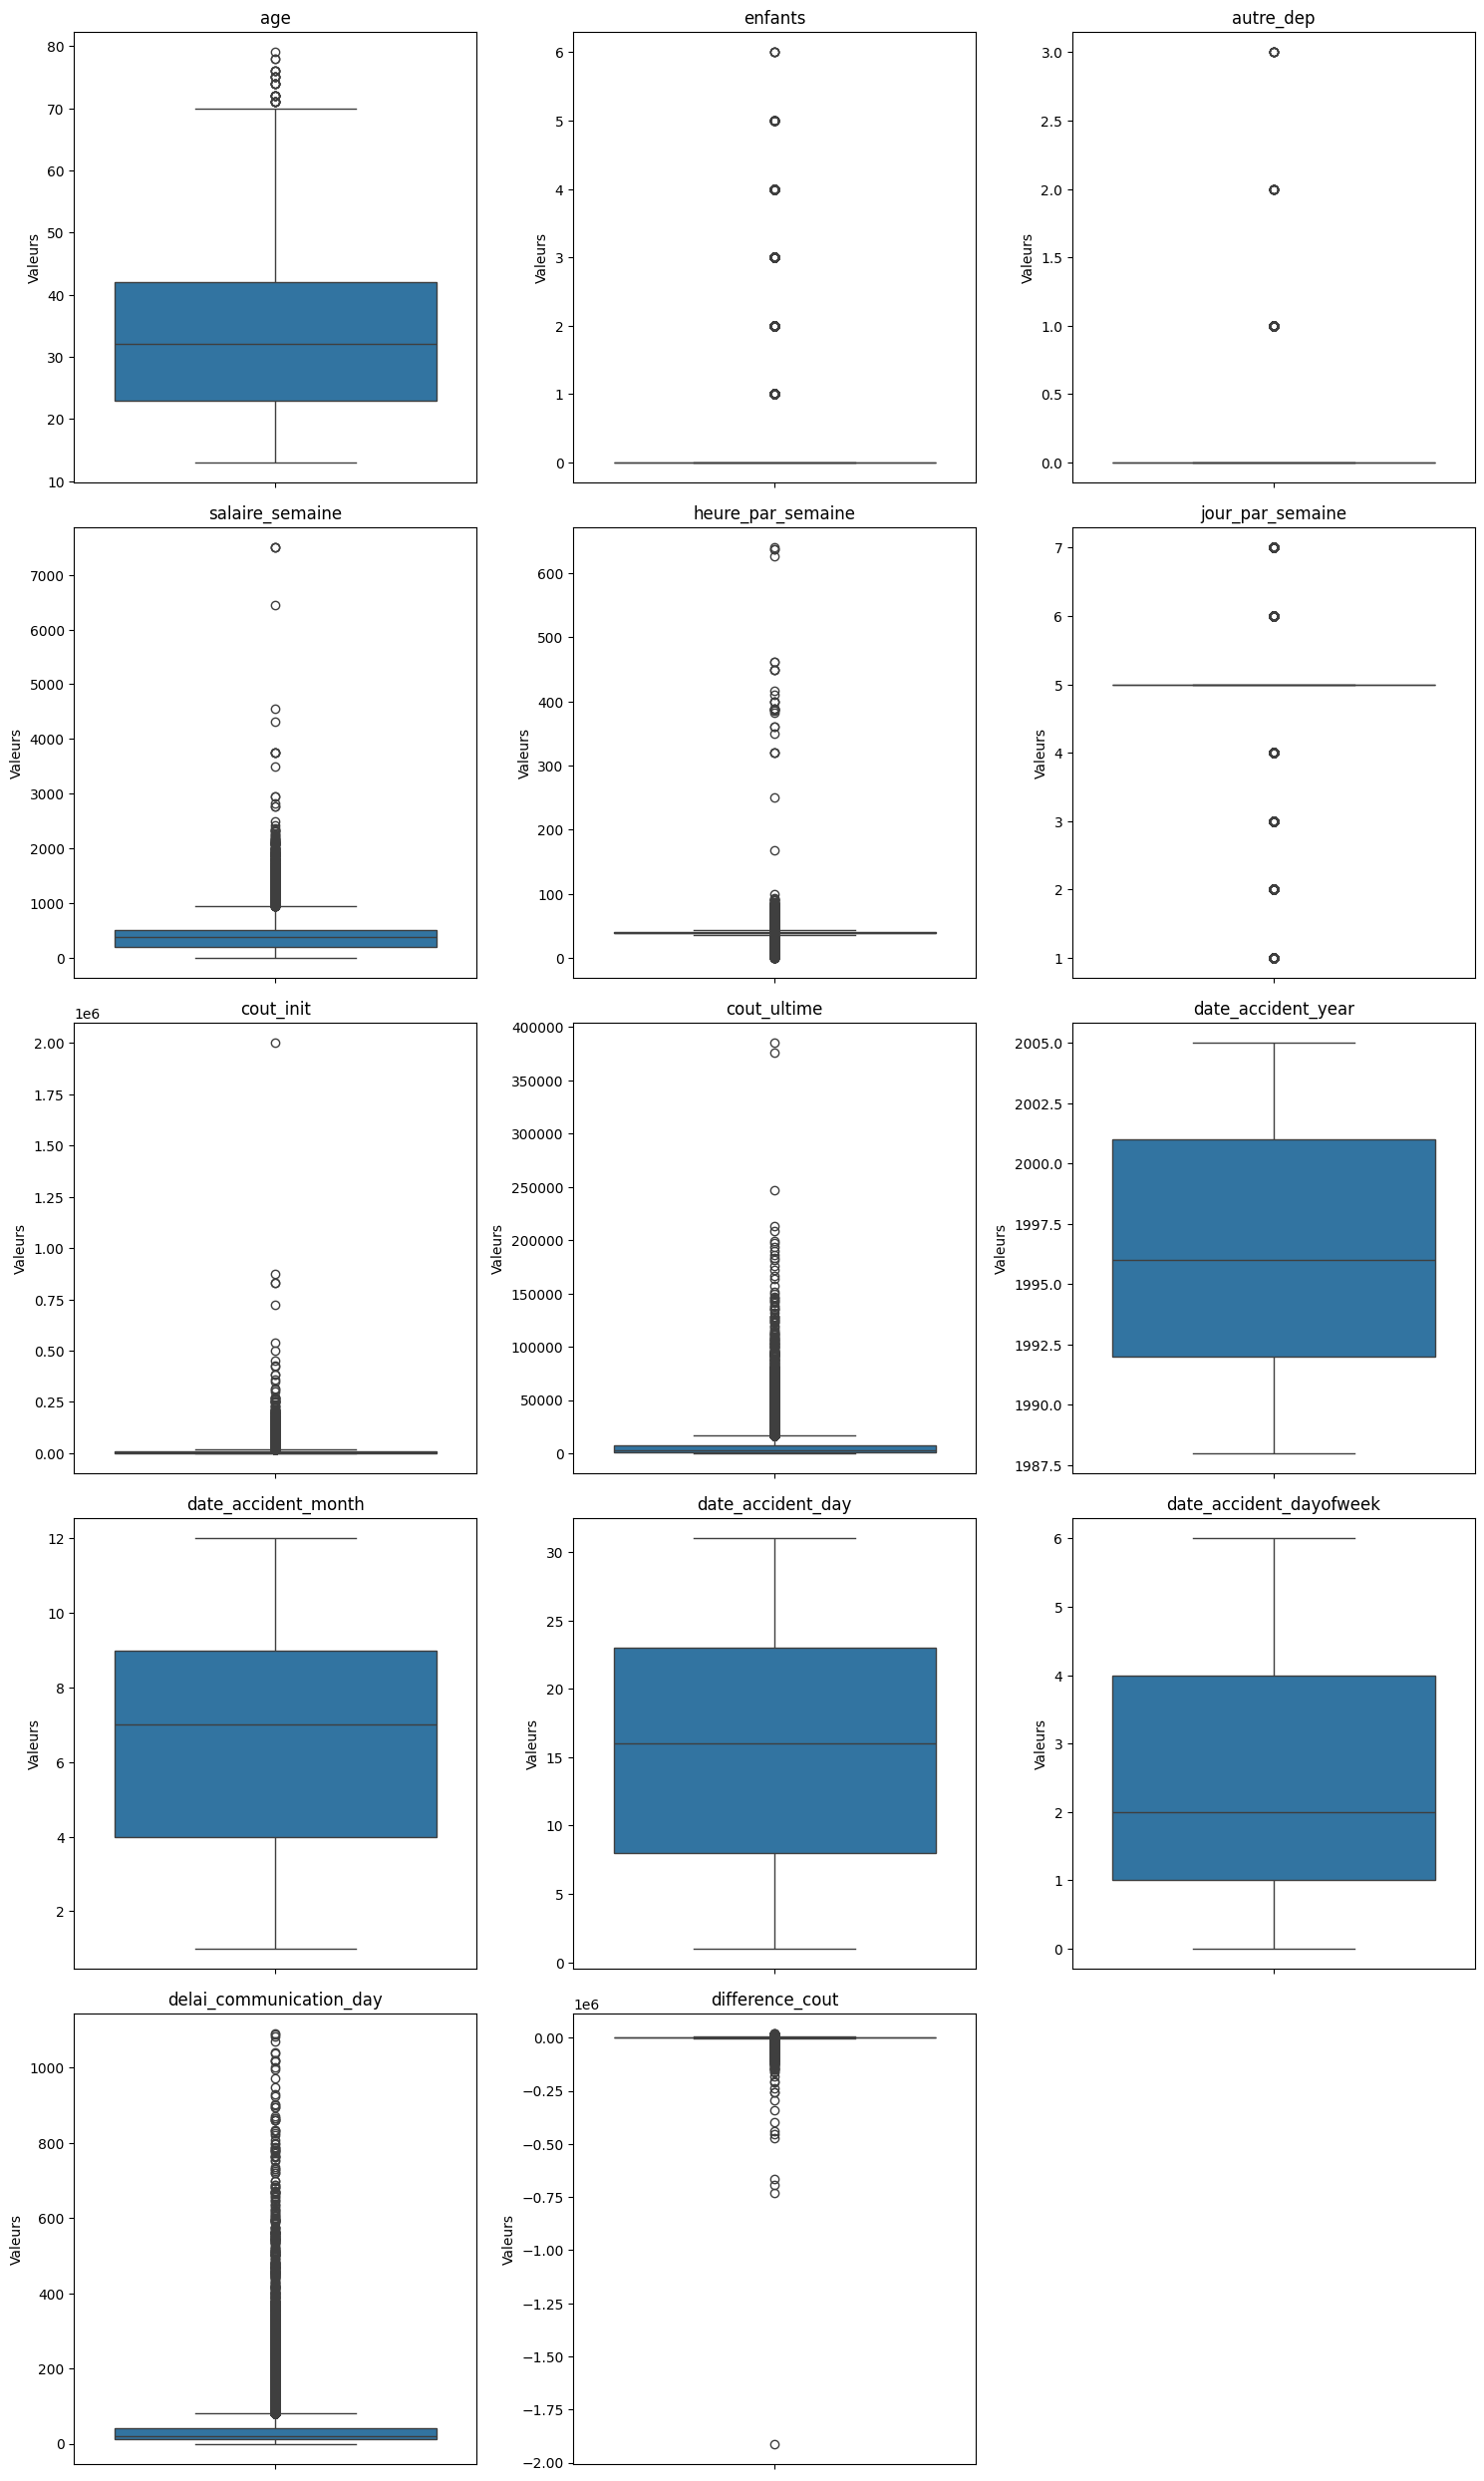

In [37]:
boxplot(data_num)

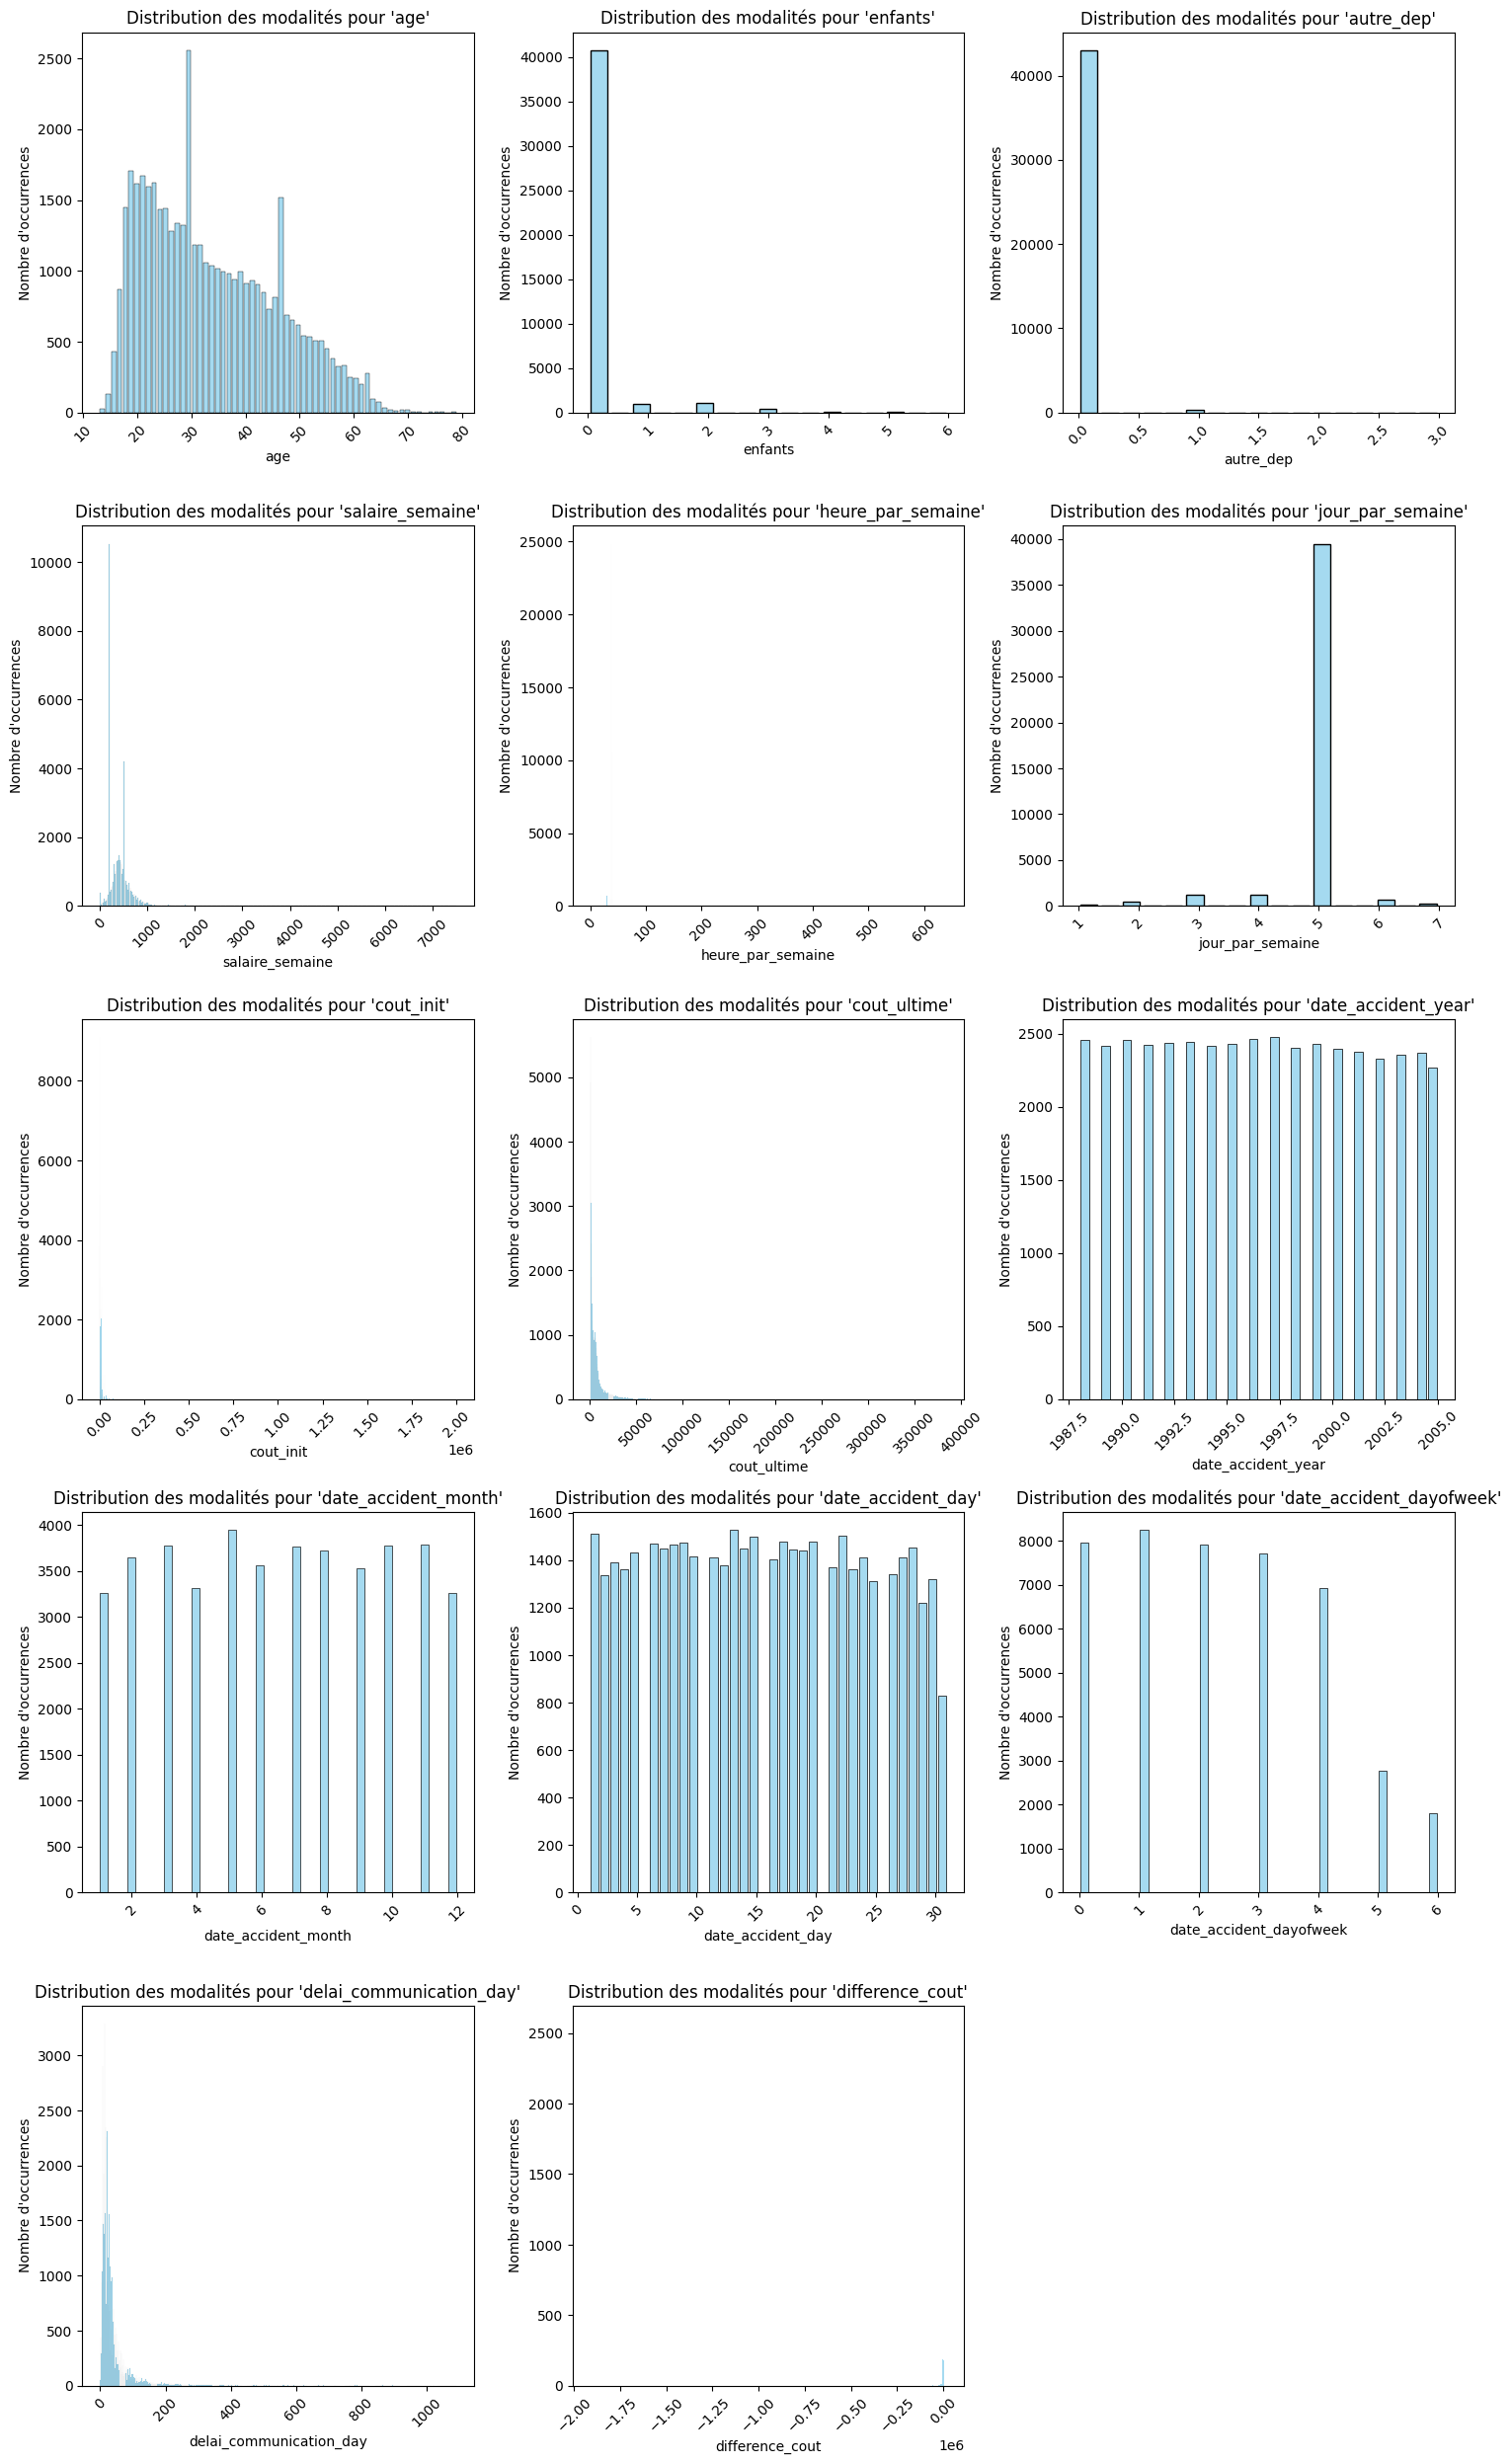

In [38]:
hist(data_num, discrete=False)

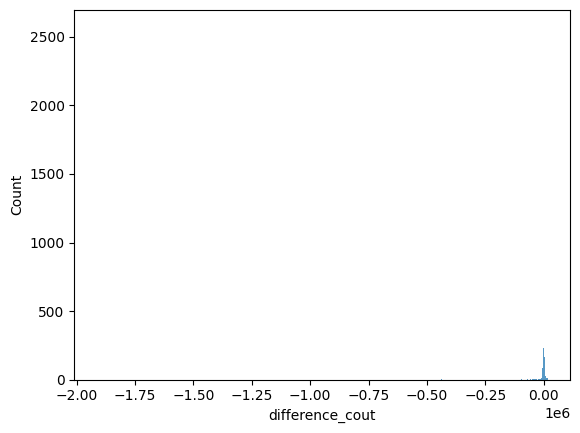

In [39]:
sns.histplot(data=data[['difference_cout']], x='difference_cout')
plt.show()


delai_communication et toutes ses variables, salaire et cout_unit ont assez d'outliers.

<Axes: >

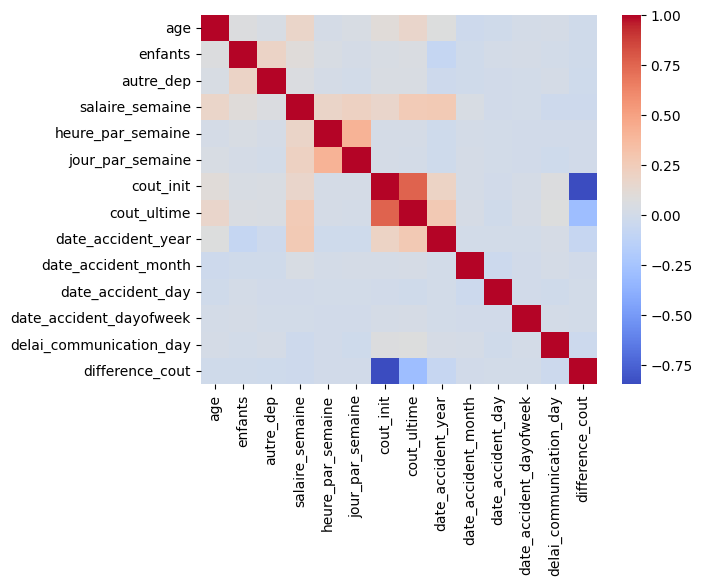

In [40]:
sns.heatmap(data_num.corr() ,cmap='coolwarm')
# on regarde la correlation entre les variables 2 à 2 pour réperer si des
# variables peuvent être rétirées aussi pour comprendre les liens entre les
# différentes variables dans nos données. %%

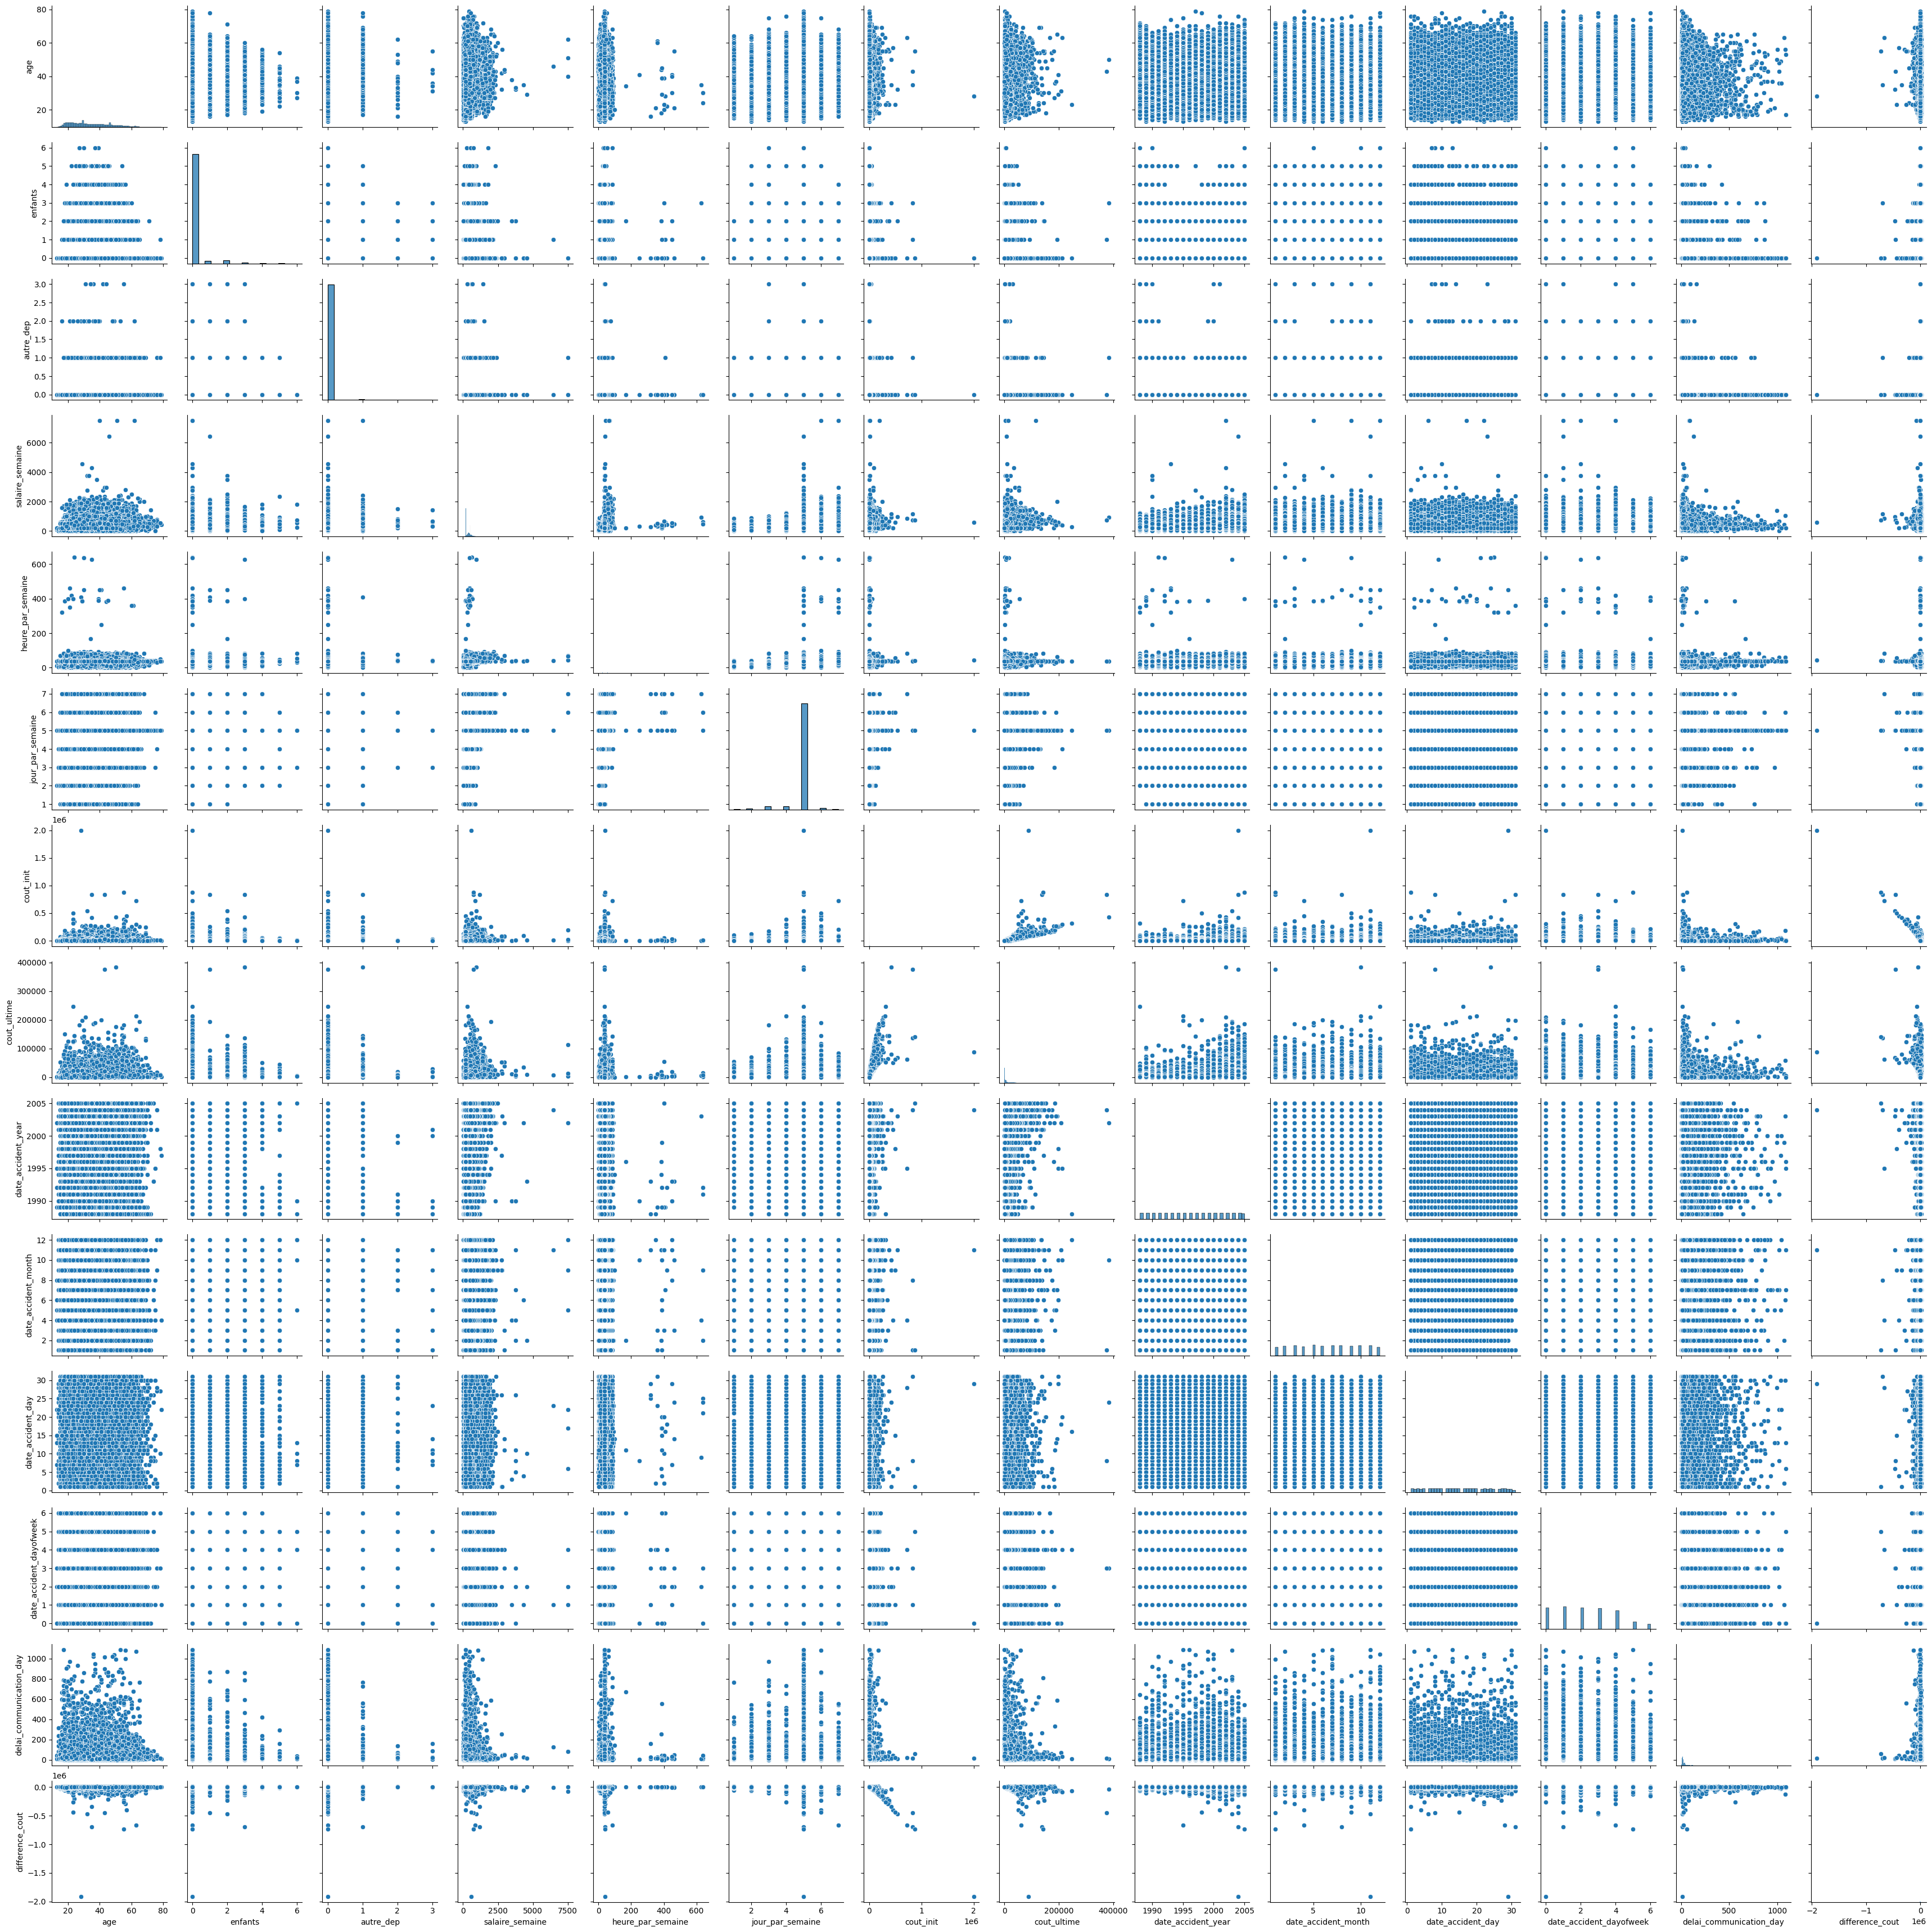

In [41]:
sns.pairplot(data) #on essaie de voir comment les variables se comportent entre elles et avec la variable à expliquer
#Et voir si on peut identifier des groupes , pour d'éventuelles segmentations.

## Outliers - Analyse

In [119]:
# Etude statistique des variables

# Variable quantitative

data_outliers.describe().round(2).T

count      mean        std       min       25%  \
age                      2283.0     37.75      12.35     13.00     27.00   
enfants                  2283.0      0.15       0.60      0.00      0.00   
autre_dep                2283.0      0.02       0.14      0.00      0.00   
salaire_semaine          2283.0    512.13     269.07      1.00    332.94   
heure_par_semaine        2283.0     38.10      16.43      0.00     38.00   
jour_par_semaine         2283.0      4.90       0.59      1.00      5.00   
cout_init                2283.0  21759.29   27853.52    100.00   5000.00   
cout_ultime              2283.0  98368.92  114903.08  18194.50  46321.76   
date_accident_year       2283.0   1998.39       5.39   1988.00   1994.00   
date_accident_month      2283.0      6.53       3.41      1.00      4.00   
date_accident_day        2283.0     15.86       8.94      1.00      8.00   
date_accident_dayofweek  2283.0      2.29       1.73      0.00      1.00   
delai_communication_day  2283.0     39.65      60.41      0.00     14.00   
difference_cout          2283.0  76609.63  109544.32  17591.74  30304.18   

                              50%        75%         max  
age                         37.00      47.00       81.00  
enfants                      0.00       0.00        9.00  
autre_dep                    0.00       0.00        2.00  
salaire_semaine            490.00     633.06     2260.94  
heure_par_semaine           38.00      40.00      627.00  
jour_par_semaine             5.00       5.00        7.00  
cout_init                12000.00   25000.00   425000.00  
cout_ultime              73916.27  120219.91  4027135.94  
date_accident_year        2000.00    2003.00     2005.00  
date_accident_month          6.00      10.00       12.00  
date_accident_day           16.00      24.00       31.00  
date_accident_dayofweek      2.00       4.00        6.00  
delai_communication_day     22.00      40.00      762.00  
difference_cout          52114.69   92923.33  3984135.94

In [120]:
data_outliers.describe(include='object').T

count unique                              top  freq
sexe            2283      2                                M  1706
status_marital  2283      3                                M  1059
type_emploi     2283      2                                F  2033
description     2283   1780  LIFTING TYRES LOWER BACK STRAIN    25

In [121]:
# Séparation des variables quanti et quali

data_num = data_outliers.select_dtypes(include='number')
data_cat = data_outliers.select_dtypes(include=['object', 'category'])

categorical_features = data_cat.columns.to_list()
numerical_features = data_num.columns.to_list()

In [122]:
# Comptage des modalités par variables qualitatives
for cat in categorical_features :
    print(data_cat[cat].value_counts())

sexe
M    1706
F     577
Name: count, dtype: int64
status_marital
M    1059
S     893
U     331
Name: count, dtype: int64
type_emploi
F    2033
P     250
Name: count, dtype: int64
description
LIFTING TYRES LOWER BACK STRAIN                            25
SLIPPED ON ROLLER TENDONITIS RIGHT SHOULDER                22
LIFTING BACK STRAIN LOWER BACK STRAIN                      20
FELL DOWN STAIRS BACK SPRAIN                               16
LIFTING STRAIN LOWER BACK STRAIN                           15
                                                           ..
SLIPPED ON WET RUBBER MAT ON FLOOR SHOULDER AND NECK        1
HIT NAIL FROM NAIL GUN NAIL CUT LEFT LEG AND BACK           1
STRUCK METAL BLIND LACERATION RIGHT THUMB CUT               1
LIFTED CRATE TURNED HURT NECK NECK STRAIN                   1
TWISTED KNEE INJURY TO LOWER BACK SPRAIN BACK RIBS HAND     1
Name: count, Length: 1780, dtype: int64


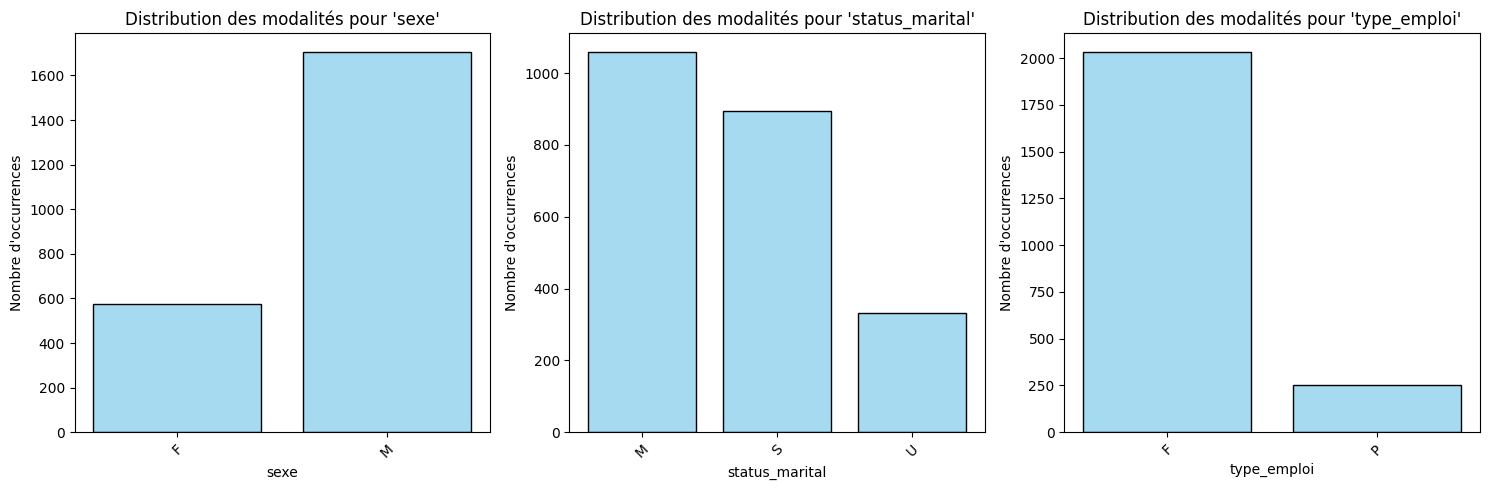

In [123]:
hist(data_cat.drop(columns='description', axis=1))

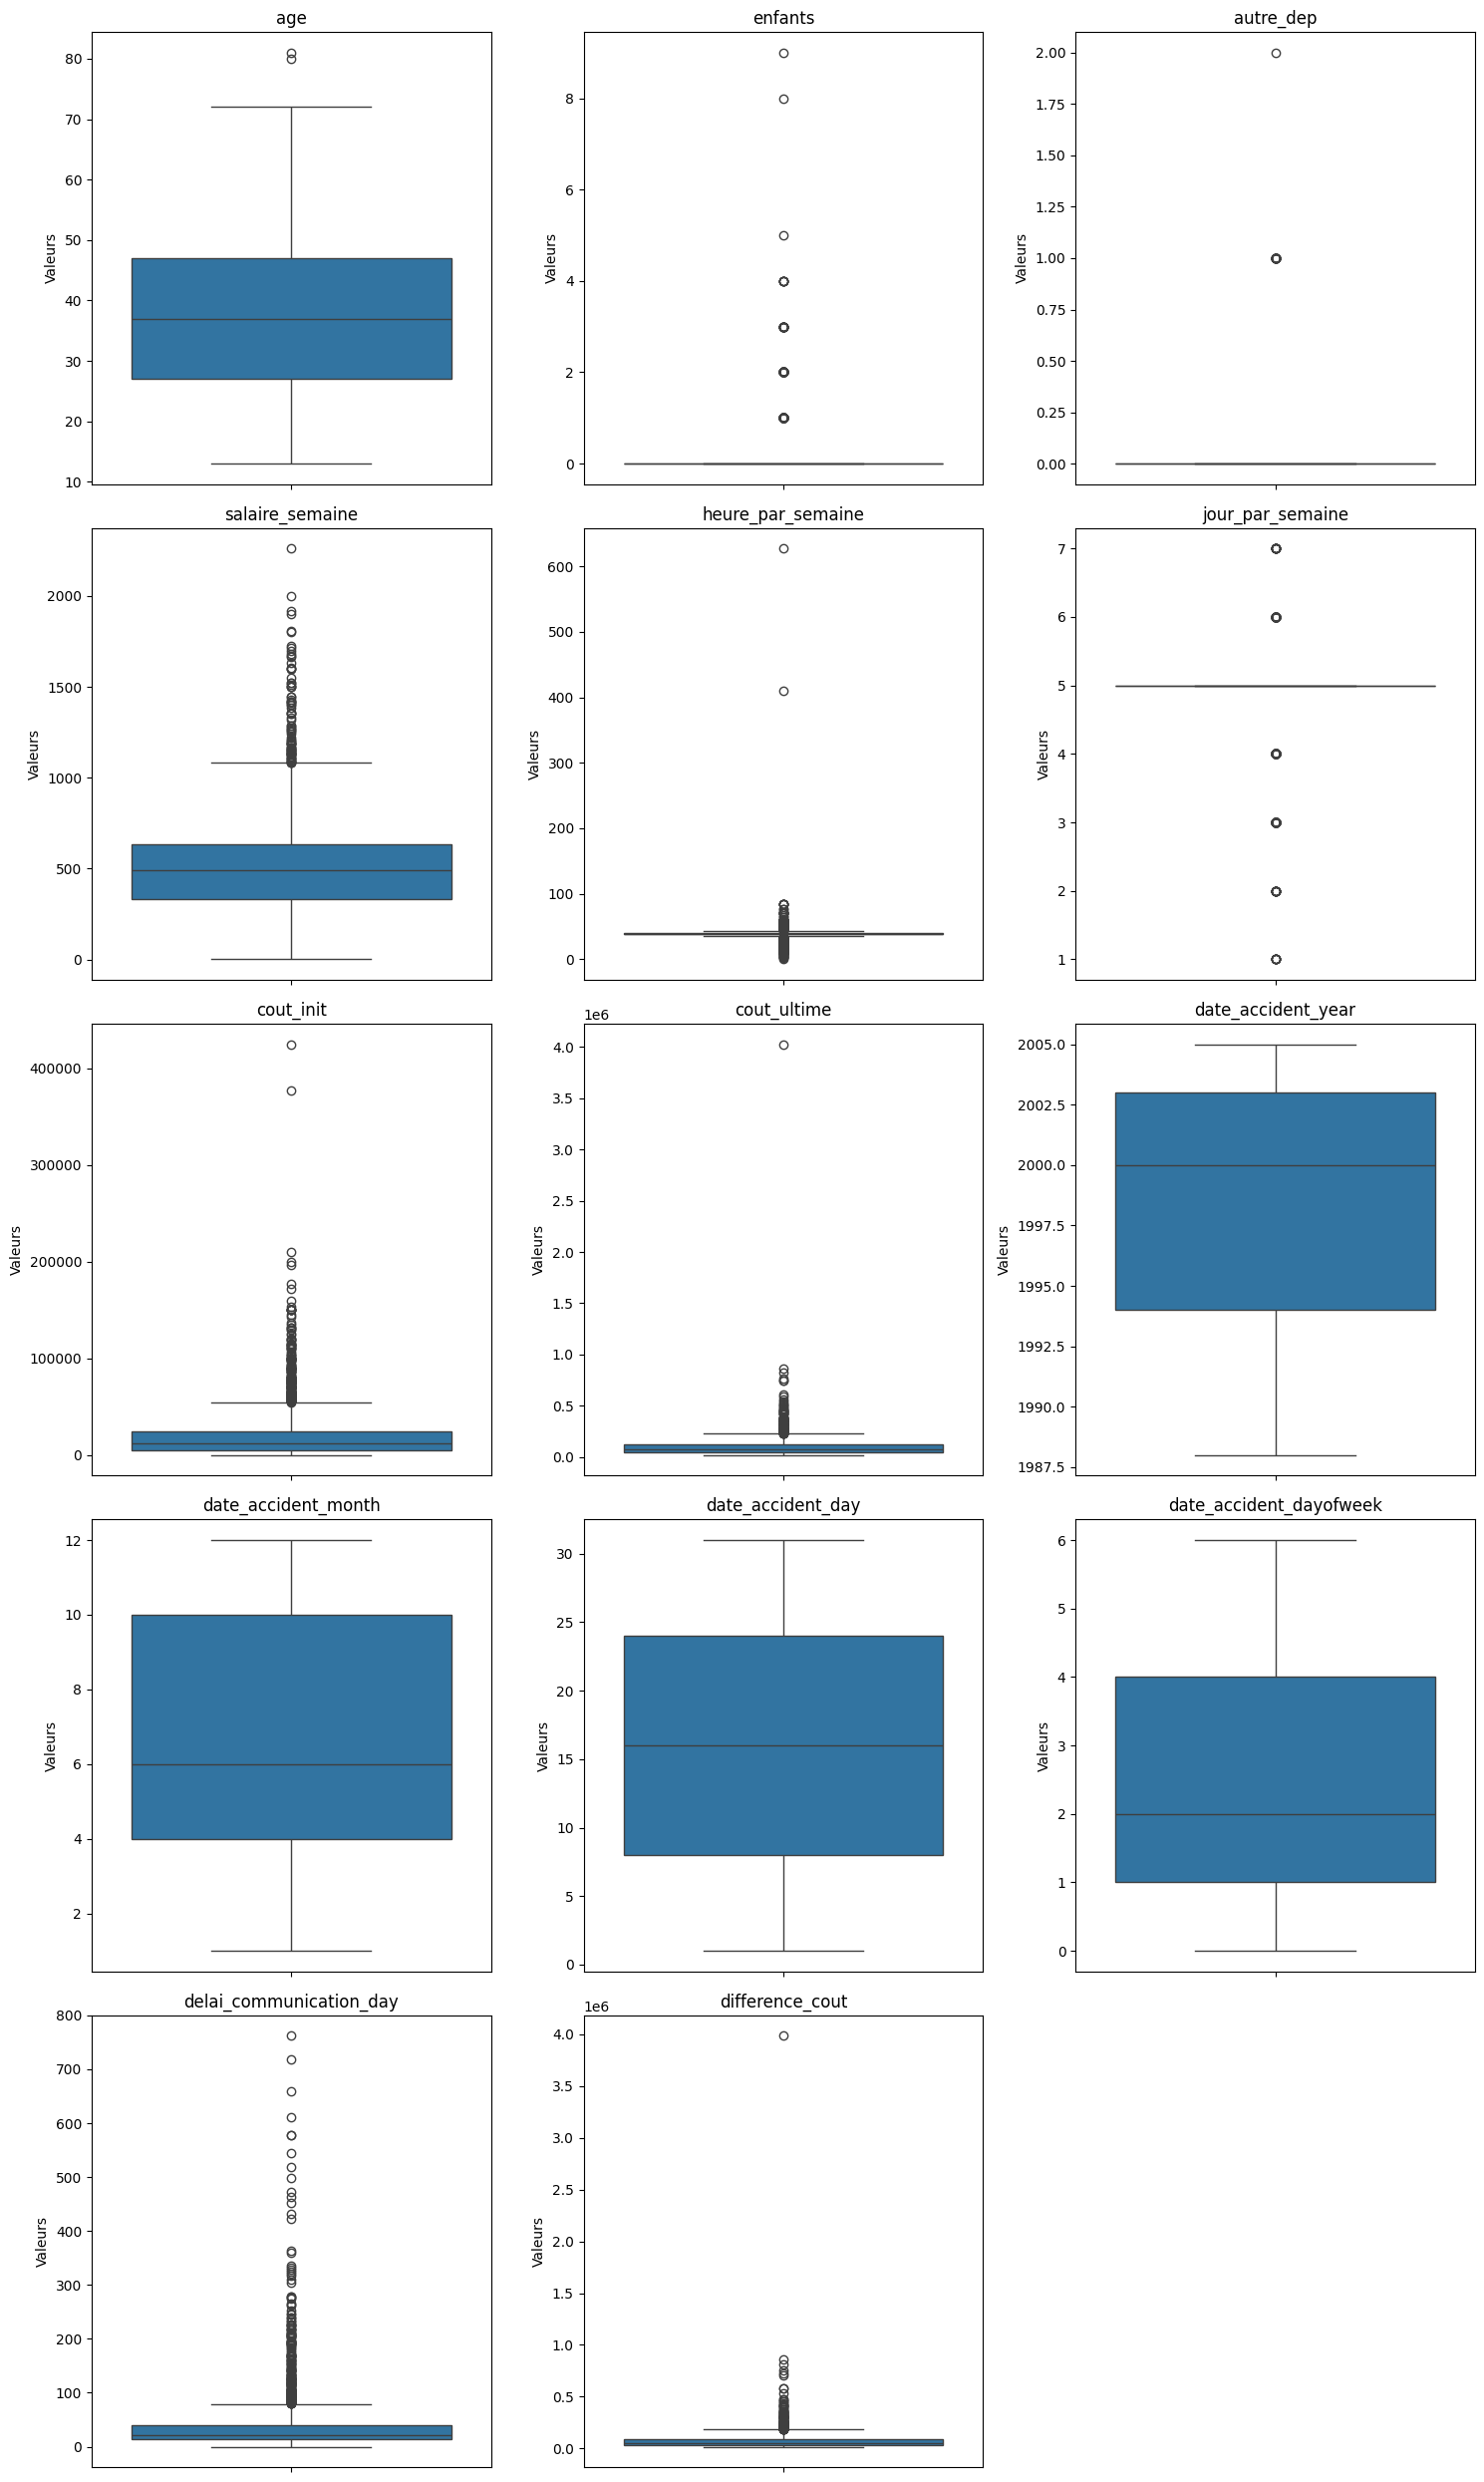

In [124]:
boxplot(data_num)

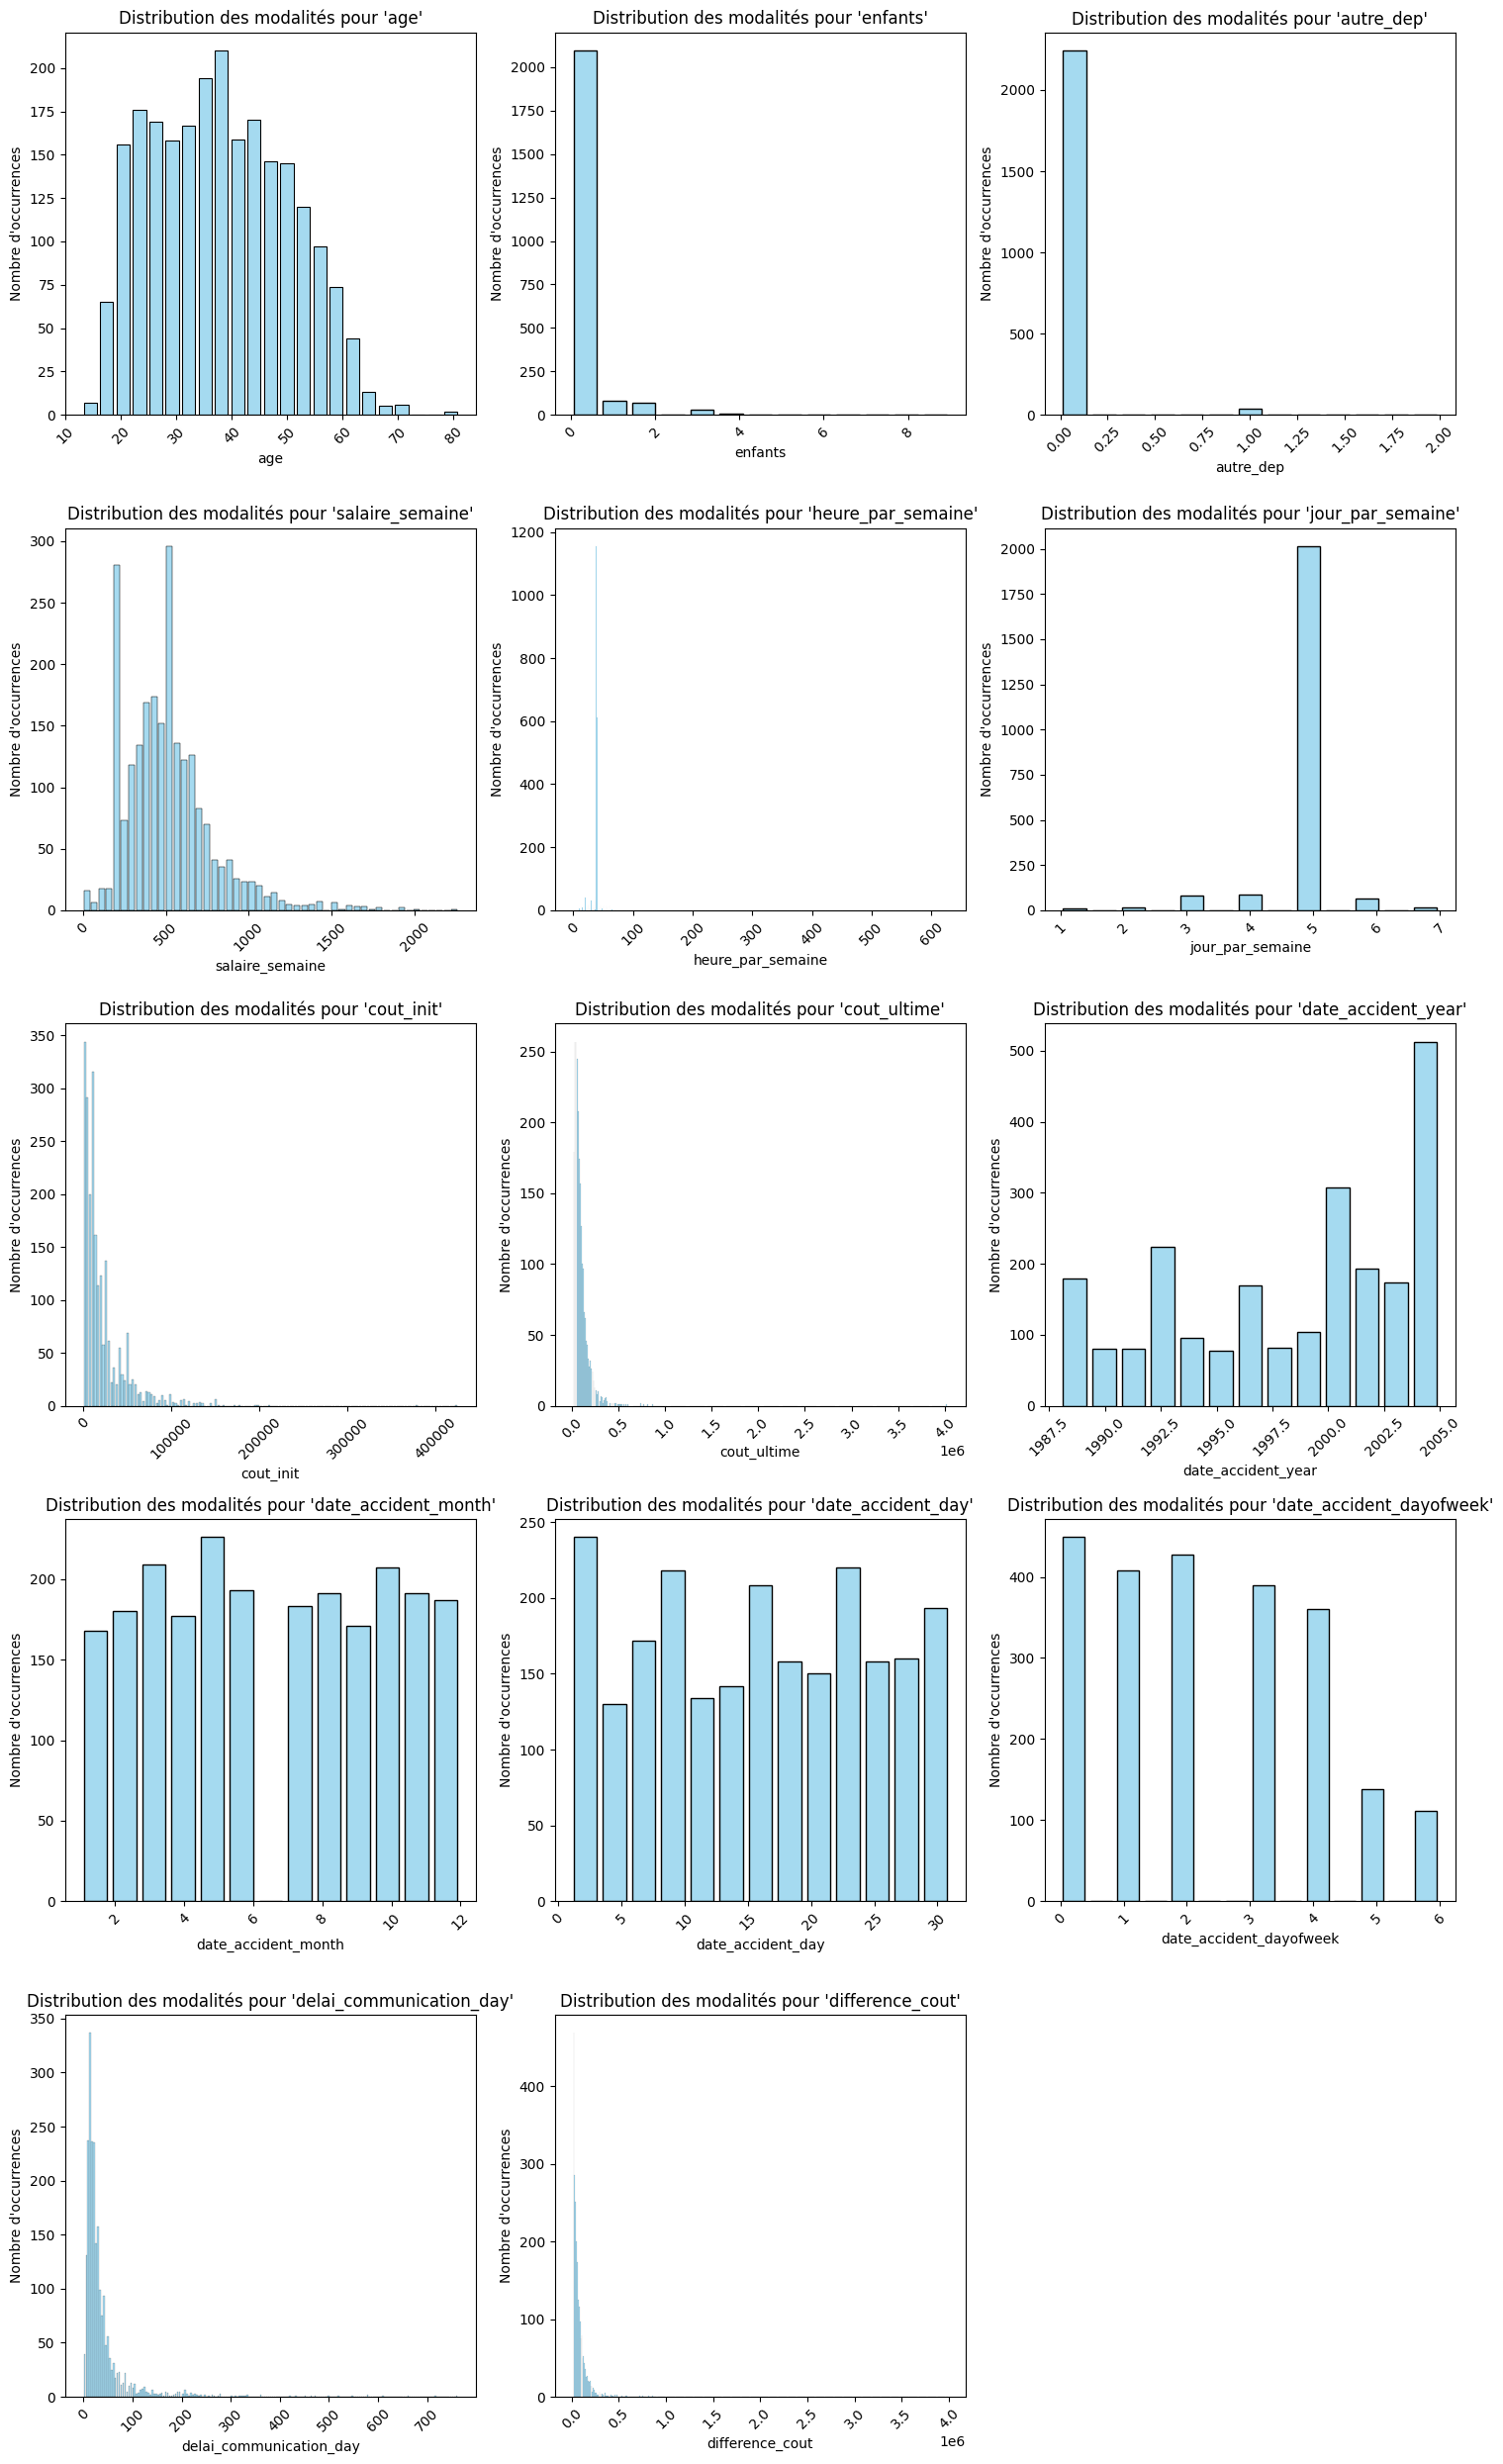

In [125]:
hist(data_num, discrete=False)

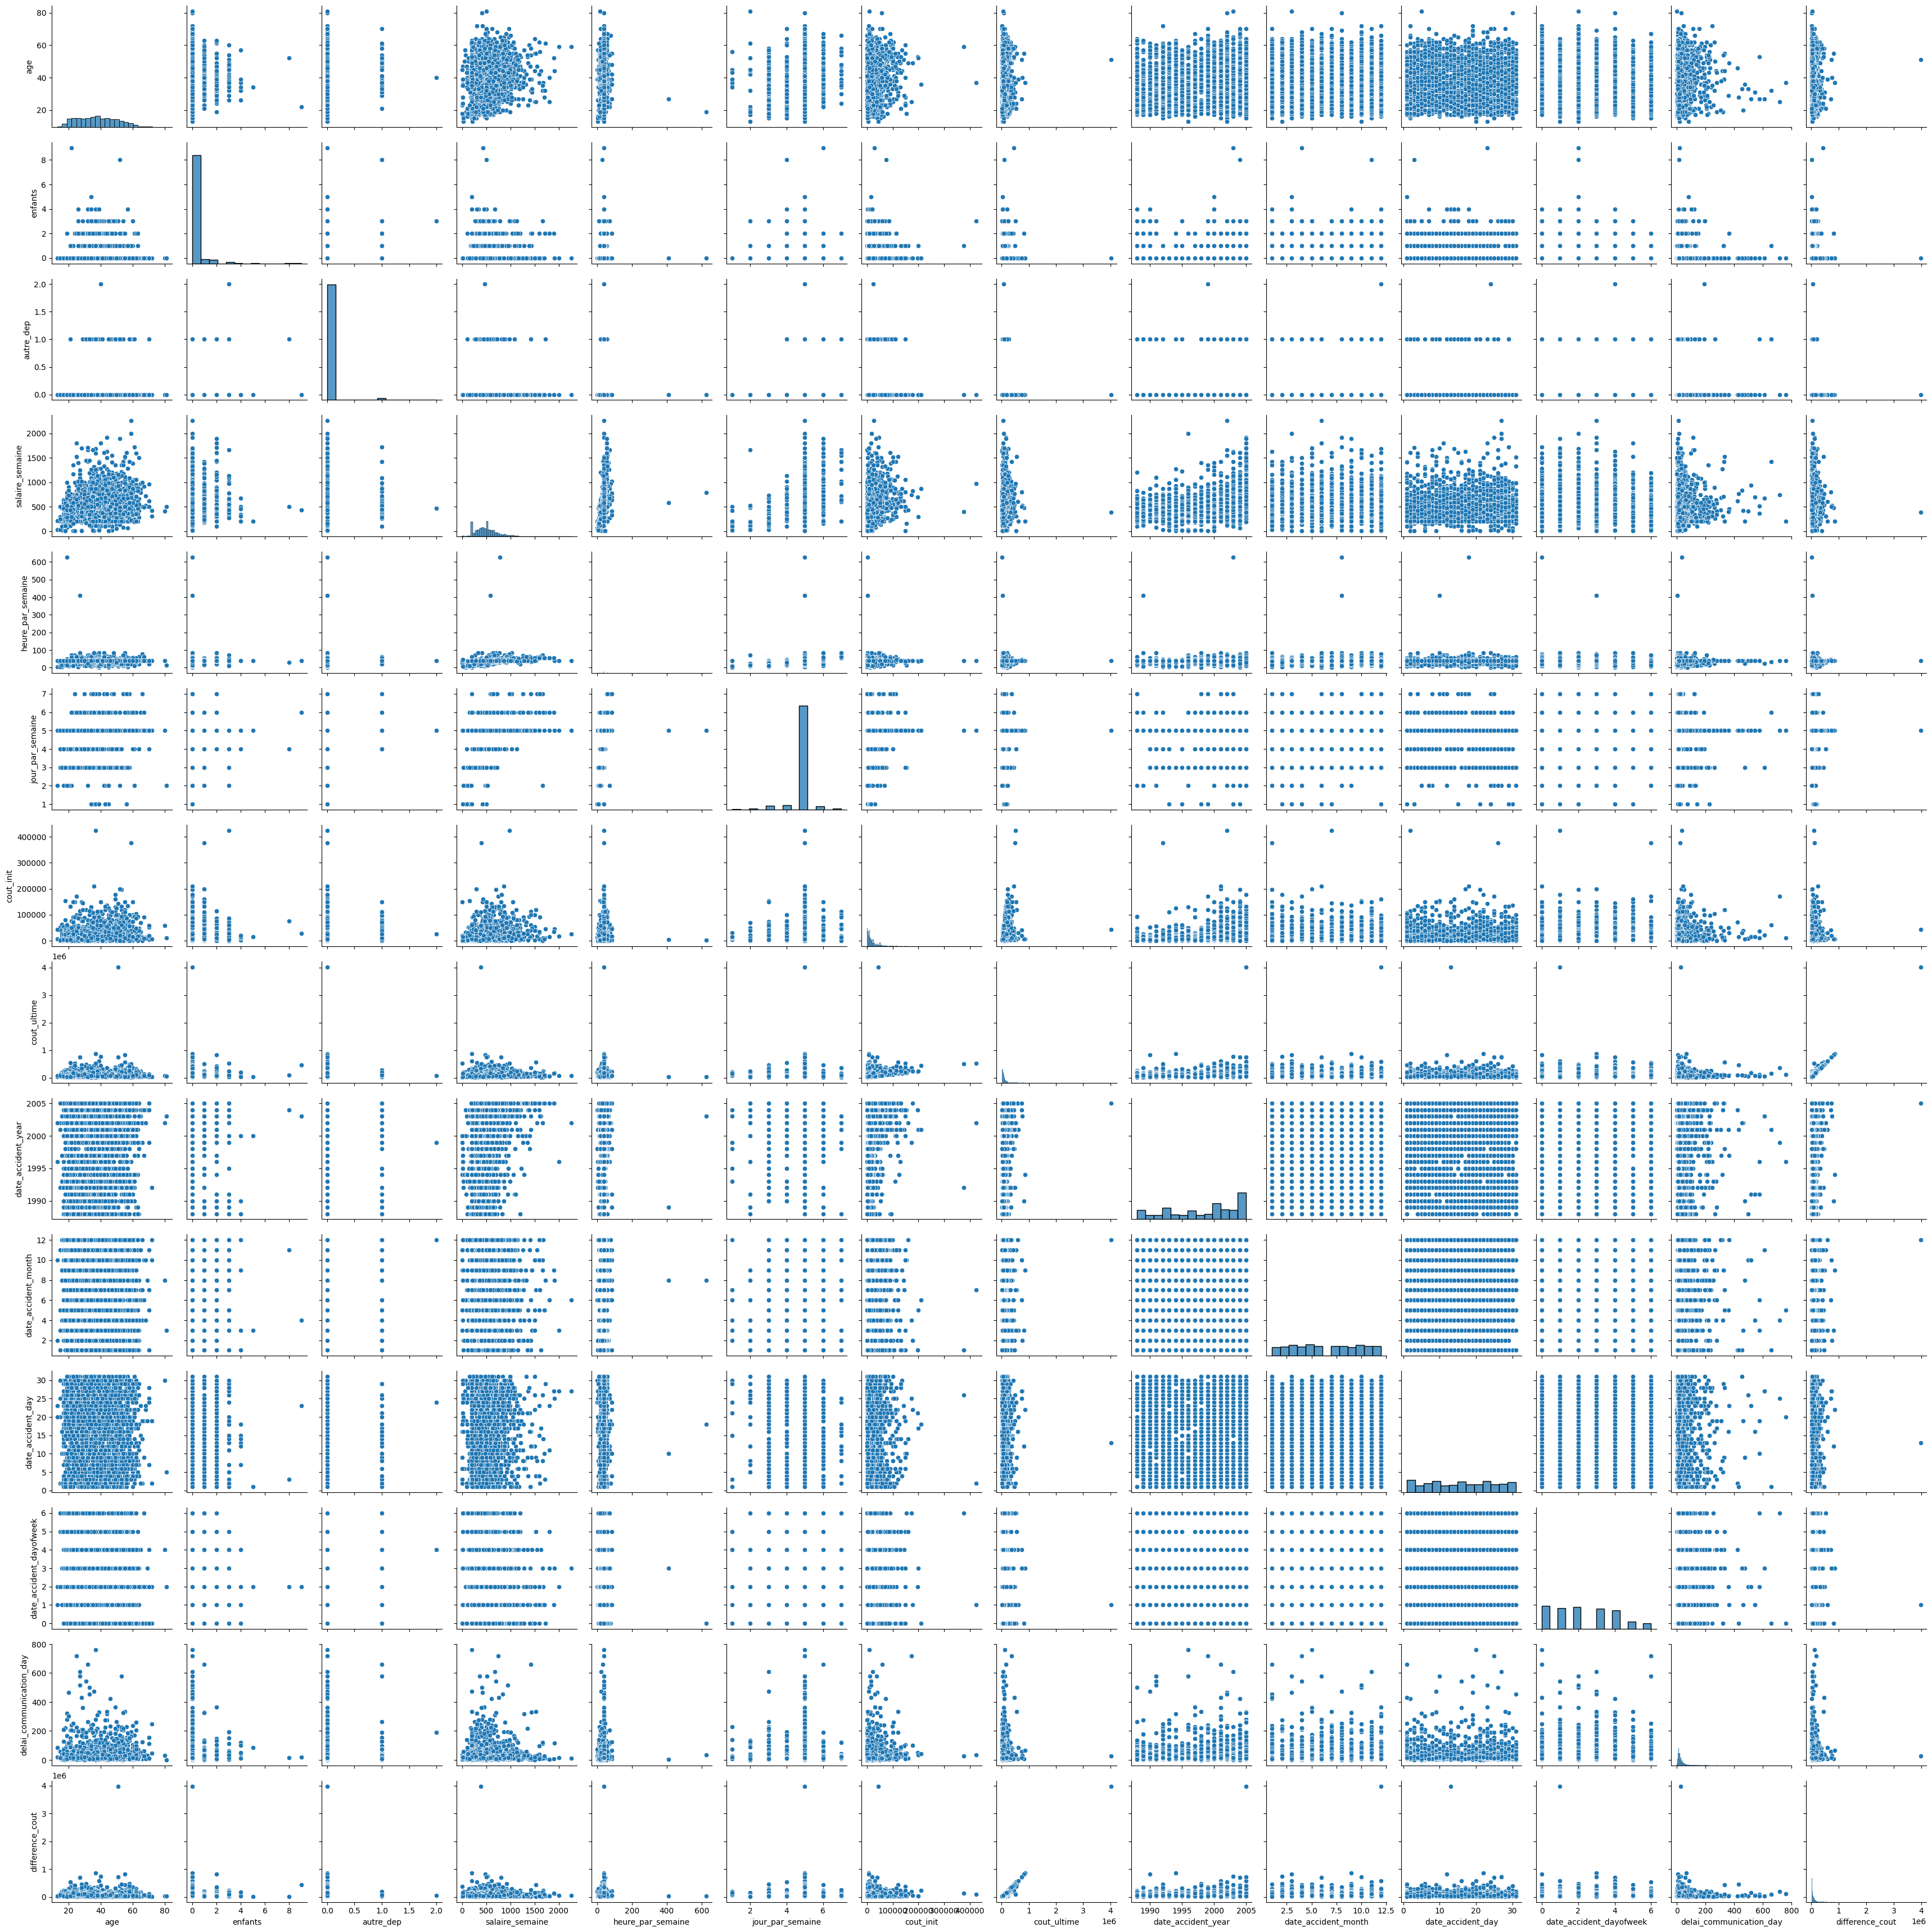

In [126]:
sns.pairplot(data_outliers)

# Gestion de la variable description et NLP

In [42]:
# data preprocessing

all_words = [word_tokenize(sentence.lower()) for sentence in data['description']]

In [43]:
# removing stop word (meaningless word that are just for lexical structure)
all_words = [[word for word in all_words[i] if word not in stops] for i in range(len(all_words))]

# remove useless direction

all_words = [[word for word in all_words[i] if word not in ['left', 'right', 'middle']] for i in range(len(all_words))]

Dans une première demarche, nous avons essayer d'entrainer le modèle dans le cadre uniquement des mots utilisés dans notre variable "DESCRIPTION" , faire une sorte de classif dans "DESCRIPTION"
Cette idée a été vite abandonnée, parceque si des mots non présents dans "DESCRPTION" apparaissent , ce mot ne sera pas reconnu par le modèle, donc on ne pourra pas affecter un score.

In [45]:
word2vec = Word2Vec(all_words, min_count=2)

CLASSIFICATION DES PARTIE DU CORPS

In [46]:
def get_all_hypernyms(word):
    hypernyms = {word}
    for synset in wn.synsets(word):
        for h in synset.closure(lambda s: s.hypernyms()):
            hypernyms.add(h.name().split('.')[0])
    return hypernyms

def classify_body_part(word):
    # Obtenir tous les hypernyms du mot
    hypernyms = get_all_hypernyms(word)

    # Définir les mots clés pour chaque catégorie
    categories = {
        'head': {'head', 'sense_organ', 'skull', 'eye'},
        'extremity': {'extremity', 'external_body_part', 'joint', 'back'},
        'internal': {'internal_organ'},
    }

    # Vérifier si c'est une partie du corps d'abord
    if not ('body_part' in hypernyms or 'anatomical_structure' in hypernyms):
        return None

    # Classifier selon les hypernyms
    for category, keywords in categories.items():
        if any(keyword in hypernyms for keyword in keywords):
            return category

    return None

In [47]:
get_all_hypernyms('heart')

{'abstraction',
 'area',
 'attribute',
 'body_part',
 'card',
 'character',
 'cognition',
 'content',
 'courage',
 'disposition',
 'entity',
 'feeling',
 'figure',
 'food',
 'heart',
 'idea',
 'impression',
 'internal_organ',
 'intuition',
 'location',
 'material',
 'matter',
 'meat',
 'nature',
 'object',
 'organ',
 'paper',
 'part',
 'physical_entity',
 'plane_figure',
 'playing_card',
 'psychological_feature',
 'region',
 'relation',
 'shape',
 'solid',
 'spirit',
 'state',
 'substance',
 'thing',
 'trait',
 'variety_meat'}

In [48]:
def is_body_part(word):
    """ c'est juste une fonction pour identifier si un mot est une partie du corps """
    all_hypernyms = get_all_hypernyms(word)

    if 'body_part' in all_hypernyms and 'object' not in all_hypernyms:
            return True
    return False

In [49]:
def body_part_classifier(sentence):
  """ cette fonction permet pour une phrase de vérifier si une partie du corps mentionnée dans cette phrase, c'est la tête, une extrémité ou un organe interne. """
  # Initialiser le lemmatiseur
  lemmatizer = WordNetLemmatizer()

  # Tokeniser la phrase
  tokens = word_tokenize(sentence.lower())
  tokens = [token for token in tokens if token not in stops]
  tokens = [token for token in tokens if token not in ['left', 'right', 'middle']]

  # Pour chaque mot, vérifier s'il s'agit d'une partie du corps
  for token in tokens:
      # Nettoyer et mettre en minuscules
      clean_token = token.lower().strip('.,!?;:')

      # Lemmatiser (mettre au singulier)
      lemma = lemmatizer.lemmatize(clean_token)

      # Vérifier si c'est une partie du corps
      word = classify_body_part(lemma)
      if word != None:
        return word

  return 'none'

In [50]:
part_of_body = data['description'].apply(body_part_classifier)

In [51]:
part_of_body

0        extremity
1        extremity
2        extremity
3        extremity
4        extremity
           ...    
45643    extremity
45644    extremity
45645    extremity
45646    extremity
45647    extremity
Name: description, Length: 43365, dtype: object

In [52]:
part_of_body.value_counts()

description
extremity    37007
head          4111
none          2088
internal       159
Name: count, dtype: int64

In [53]:
data['part_of_body'] = part_of_body

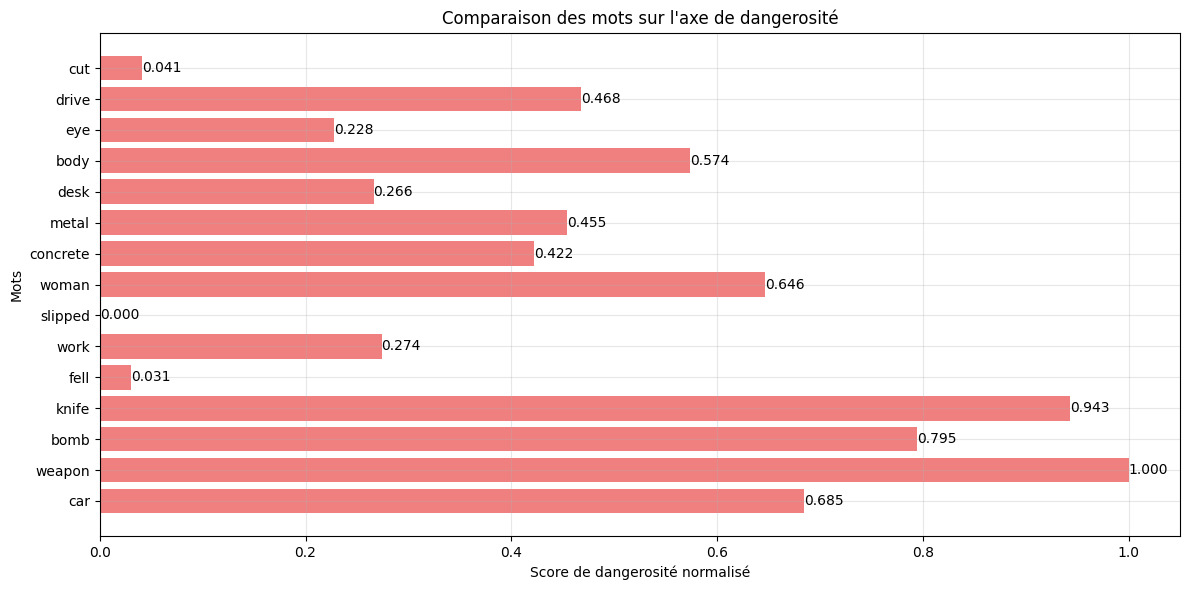


Scores de dangerosité (du plus dangereux au moins dangereux):
weapon: 1.000
knife: 0.943
bomb: 0.795
car: 0.685
woman: 0.646
body: 0.574
drive: 0.468
metal: 0.455
concrete: 0.422
work: 0.274
desk: 0.266
eye: 0.228
cut: 0.041
fell: 0.031
slipped: 0.000

Matrice de similarité entre les mots:


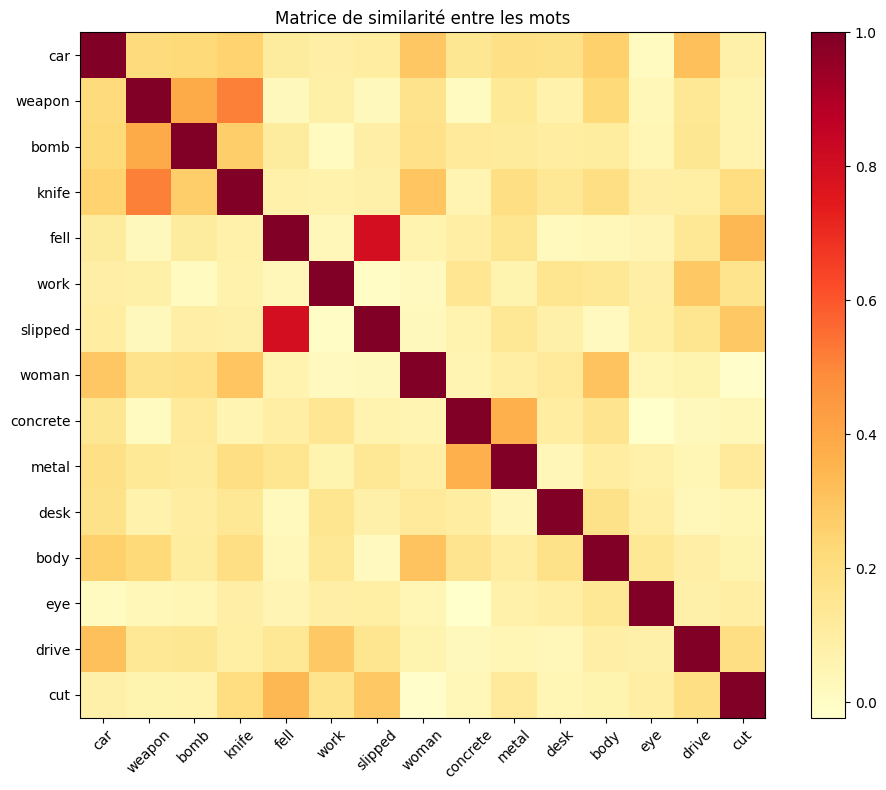

In [54]:
def calculate_danger_score(word):
    """
    Calcule un score de dangerosité pour un mot donné
    en le projetant sur l'axe de danger défini
    """

    lemmatizer = WordNetLemmatizer()

    try:
        lemma = lemmatizer.lemmatize(word.lower())
        # Définir l'axe de danger en utilisant des mots opposés
        dangerous_words = ['dangerous', 'deadly', 'assault', 'stab', 'vehicle', 'weapon', 'drive', 'fracture', 'murder']
        safe_words = ['safe', 'harmless', 'protect', 'cut', 'fall', 'struck', 'work', 'lift', 'strain', 'bruise', 'slip', 'steal']

        # Calculer l'axe de danger moyen
        danger_vector = np.mean([model[w] for w in dangerous_words], axis=0)
        safe_vector = np.mean([model[w] for w in safe_words], axis=0)
        danger_axis = danger_vector - safe_vector
        danger_axis = danger_axis / np.linalg.norm(danger_axis)
        # Obtenir le vecteur du mot
        word_vector = model[lemma]
        # Projeter sur l'axe de danger
        projection = np.dot(word_vector, danger_axis)
        return projection
    except KeyError:
        return None

# Liste de mots à comparer
test_words = ['car', 'weapon', 'bomb', 'knife', 'fell', 'work', 'slipped', 'woman', 'concrete', 'metal', 'desk', 'body', 'eye', 'drive', 'cut']

# Calculer les scores pour chaque mot
scores = []
valid_words = []
for word in test_words:
    score = calculate_danger_score(word)
    if score is not None:
        scores.append(score)
        valid_words.append(word)

# Normaliser les scores entre 0 et 1 pour une meilleure visualisation
scores = np.array(scores)
scores = (scores - min(scores)) / (max(scores) - min(scores))

# Créer un graphique
plt.figure(figsize=(12, 6))
plt.barh(valid_words, scores, color='lightcoral')
plt.xlabel('Score de dangerosité normalisé')
plt.ylabel('Mots')
plt.title('Comparaison des mots sur l\'axe de dangerosité')
plt.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(scores):
    plt.text(v, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Afficher les scores triés
print("\nScores de dangerosité (du plus dangereux au moins dangereux):")
sorted_items = sorted(zip(valid_words, scores), key=lambda x: x[1], reverse=True)
for word, score in sorted_items:
    print(f"{word}: {score:.3f}")

# Calculer la similarité entre les mots
print("\nMatrice de similarité entre les mots:")
similarity_matrix = np.zeros((len(valid_words), len(valid_words)))
for i, word1 in enumerate(valid_words):
    for j, word2 in enumerate(valid_words):
        try:
            similarity_matrix[i][j] = model.similarity(word1, word2)
        except:
            similarity_matrix[i][j] = 0

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='YlOrRd')
plt.colorbar()
plt.xticks(range(len(valid_words)), valid_words, rotation=45)
plt.yticks(range(len(valid_words)), valid_words)
plt.title('Matrice de similarité entre les mots')
plt.tight_layout()
plt.show()

In [55]:
def severity_scorer(sentence, alpha = 0.9):
  """ cette fonction permet de définir la manière dont on attribue un score de sévérité à  une phrase,
  en effectuant certaines opérations définies plus bas avec les scores des verbes, des noms"""

  tokens = nltk.word_tokenize(sentence.lower())
  tokens = [token for token in tokens if token not in stops]
  tokens = [token for token in tokens if token not in string.punctuation]

  tagged = nltk.pos_tag(tokens)
  verbs_scores = [calculate_danger_score(word) for word, pos in tagged if pos.startswith('VB') and calculate_danger_score(word) != None]
  try:
    verbs_mean_scores = np.max(verbs_scores)
  except:
    verbs_mean_scores = 0
  try:
    nouns_scores = max([calculate_danger_score(word) for word, pos in tagged if pos.startswith('NN') and calculate_danger_score(word) != None])
  except:
    nouns_scores = 0
  return verbs_mean_scores * alpha + nouns_scores * (1 - alpha)

In [56]:
# Severity scorer

data['severity_score'] = data['description'].apply(severity_scorer)

In [57]:
data.to_csv('data_cleaned_1.csv', index=False) #on exporte une première fois , pour avoir un premier rendu pour visualiser si le score attribuer est logique d'un point de vue humain

In [58]:
data.head()

age sexe status_marital  enfants  autre_dep  salaire_semaine type_emploi  \
0   31    M              M        3          3           573.31           F   
1   36    M              M        0          3           673.00           F   
2   55    M              M        0          3          1442.31           F   
3   42    M              M        2          3           610.54           F   
4   34    M              M        2          3           307.00           F   

   heure_par_semaine  jour_par_semaine  \
0               42.0                 3   
1               38.0                 5   
2               40.0                 5   
3               40.0                 5   
4               40.0                 5   

                                      description  cout_init   cout_ultime  \
0     GETTING INTO MACHINE CUT MIDDLE LEFT FINGER       1700   1490.769783   
1           UNSPECIFIED STRAINED LEFT KNEE INJURY      35000  29739.029390   
2                        SLIPPED DOWN STAIRS BACK      15000  18907.561660   
3  STRUCK HAMMER SKIN LOSS AND BLISTER AND FINGER       1000   1264.628466   
4           STACKING CARTONS PAIN LOWER BACK PAIN        630   2052.675809   

   date_accident_year  date_accident_month  date_accident_day  \
0                1990                    9                  8   
1                2001                    3                 23   
2                2000                    7                 11   
3                1988                   11                  7   
4                1988                   11                 14   

   date_accident_dayofweek  delai_communication_day  difference_cout  \
0                        5                       17      -209.230217   
1                        4                       90     -5260.970610   
2                        1                      160      3907.561660   
3                        0                        5       264.628466   
4                        0                        2      1422.675809   

  part_of_body  severity_score  
0    extremity       -0.119866  
1    extremity       -0.371114  
2    extremity       -0.725567  
3    extremity        0.018443  
4    extremity       -0.066023

In [59]:
data['severity_score'].describe()

count    43365.000000
mean        -0.124030
std          0.262864
min         -0.778589
25%         -0.322506
50%         -0.107800
75%          0.049467
max          1.285214
Name: severity_score, dtype: float64

<Axes: xlabel='severity_score', ylabel='Count'>

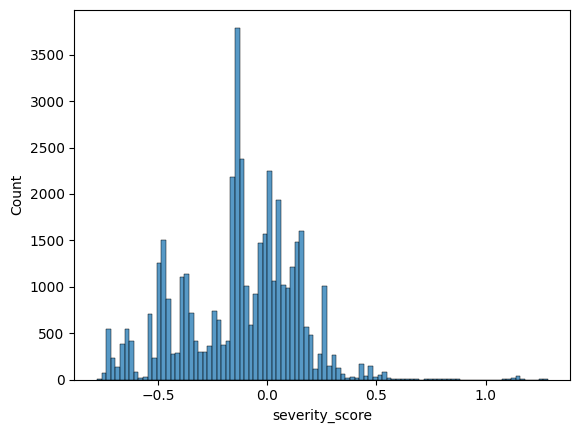

In [60]:
sns.histplot(data=data, x='severity_score') #pour voir la logique
#observer la répartition des scores de sévérité
#si il y'a assez d'abscisses élevées, celà signifie qu'il ya assez de sinistres graves


In [61]:
# Révision
data = data.drop(columns='description', axis=1)

In [62]:
data.head()

age sexe status_marital  enfants  autre_dep  salaire_semaine type_emploi  \
0   31    M              M        3          3           573.31           F   
1   36    M              M        0          3           673.00           F   
2   55    M              M        0          3          1442.31           F   
3   42    M              M        2          3           610.54           F   
4   34    M              M        2          3           307.00           F   

   heure_par_semaine  jour_par_semaine  cout_init   cout_ultime  \
0               42.0                 3       1700   1490.769783   
1               38.0                 5      35000  29739.029390   
2               40.0                 5      15000  18907.561660   
3               40.0                 5       1000   1264.628466   
4               40.0                 5        630   2052.675809   

   date_accident_year  date_accident_month  date_accident_day  \
0                1990                    9                  8   
1                2001                    3                 23   
2                2000                    7                 11   
3                1988                   11                  7   
4                1988                   11                 14   

   date_accident_dayofweek  delai_communication_day  difference_cout  \
0                        5                       17      -209.230217   
1                        4                       90     -5260.970610   
2                        1                      160      3907.561660   
3                        0                        5       264.628466   
4                        0                        2      1422.675809   

  part_of_body  severity_score  
0    extremity       -0.119866  
1    extremity       -0.371114  
2    extremity       -0.725567  
3    extremity        0.018443  
4    extremity       -0.066023

In [63]:
# Révérification des varaibles catégorielles

# Séparation des variables quanti et quali

data_num = data.select_dtypes(include='number')
data_cat = data.select_dtypes(include=['object', 'category'])

categorical_features = data_cat.columns.to_list()
numerical_features = data_num.columns.to_list()

# Comptage des modalités par variables qualitatives
for cat in categorical_features :
    print(data_cat[cat].value_counts())

sexe
M    33475
F     9888
U        2
Name: count, dtype: int64
status_marital
S    21193
M    18037
U     4135
Name: count, dtype: int64
type_emploi
F    39406
P     3959
Name: count, dtype: int64
part_of_body
extremity    37007
head          4111
none          2088
internal       159
Name: count, dtype: int64


In [64]:
# Suppression des observations dont les sexes est Undefined puisque qu'ils ne sont pas bien representé

data = data[data['sexe'] != 'U']

In [65]:
# Encodage des variables catégorielles

data['type_emploi'] = data['type_emploi'].replace(['F', 'P'], [1, 0])

In [66]:
data['sexe'] = data['sexe'].replace(['M', 'F'], [1, 0])

In [67]:
data.to_csv('data_cleaned_2.csv', index=False)

In [68]:
# One Hot Encoder

# status_marital

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe.fit(data['status_marital'].to_numpy().reshape(-1, 1))

data_ohe_sm = ohe.transform(data['status_marital'].to_numpy().reshape(-1, 1))

data_ohe_sm = pd.DataFrame(data_ohe_sm, columns=['status_marital_' + name for name in ohe.categories_[0]])

data_ohe_sm

status_marital_M  status_marital_S  status_marital_U
0                   1.0               0.0               0.0
1                   1.0               0.0               0.0
2                   1.0               0.0               0.0
3                   1.0               0.0               0.0
4                   1.0               0.0               0.0
...                 ...               ...               ...
43358               1.0               0.0               0.0
43359               0.0               1.0               0.0
43360               0.0               1.0               0.0
43361               0.0               1.0               0.0
43362               0.0               1.0               0.0

[43363 rows x 3 columns]

<Axes: >

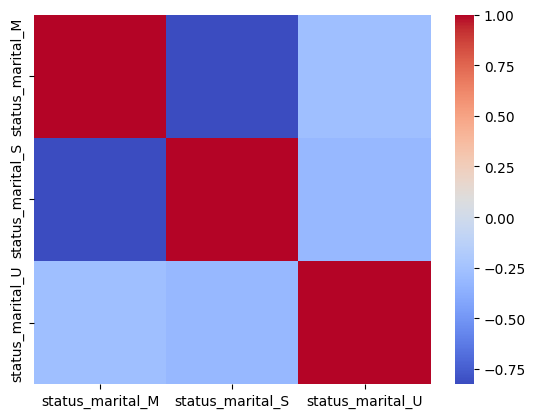

In [69]:
sns.heatmap(data_ohe_sm.corr(), cmap='coolwarm')

In [70]:
# part_of_body

ohe.fit(data['part_of_body'].to_numpy().reshape(-1, 1))

data_ohe_pob = ohe.transform(data['part_of_body'].to_numpy().reshape(-1, 1))

data_ohe_pob = pd.DataFrame(data_ohe_pob, columns=['part_of_body_' + name for name in ohe.categories_[0]])

data_ohe_pob

part_of_body_extremity  part_of_body_head  part_of_body_internal  \
0                         1.0                0.0                    0.0   
1                         1.0                0.0                    0.0   
2                         1.0                0.0                    0.0   
3                         1.0                0.0                    0.0   
4                         1.0                0.0                    0.0   
...                       ...                ...                    ...   
43358                     1.0                0.0                    0.0   
43359                     1.0                0.0                    0.0   
43360                     1.0                0.0                    0.0   
43361                     1.0                0.0                    0.0   
43362                     1.0                0.0                    0.0   

       part_of_body_none  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
43358                0.0  
43359                0.0  
43360                0.0  
43361                0.0  
43362                0.0  

[43363 rows x 4 columns]

<Axes: >

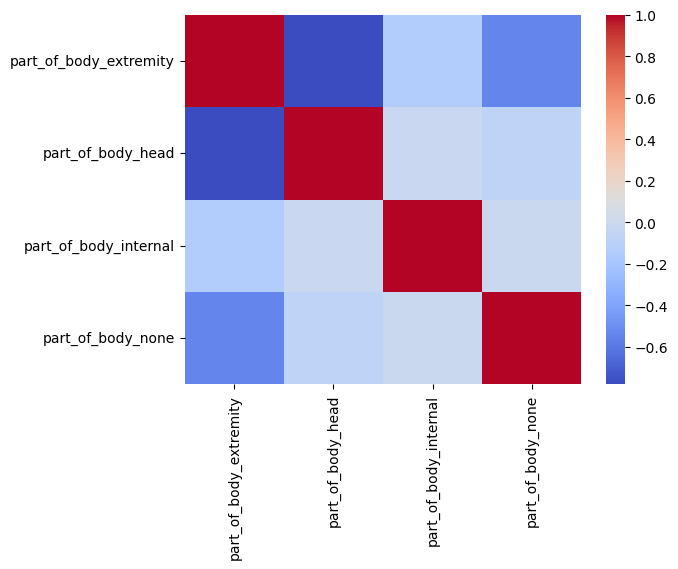

In [71]:
sns.heatmap(data_ohe_pob.corr(), cmap='coolwarm')

In [72]:
data_enc = pd.concat([data.reset_index(drop=True), data_ohe_sm, data_ohe_pob], axis=1)

data_enc = data_enc.drop(columns=['status_marital', 'part_of_body'], axis=1)

In [73]:
data_enc

age  sexe  enfants  autre_dep  salaire_semaine  type_emploi  \
0       31     1        3          3           573.31            1   
1       36     1        0          3           673.00            1   
2       55     1        0          3          1442.31            1   
3       42     1        2          3           610.54            1   
4       34     1        2          3           307.00            1   
...    ...   ...      ...        ...              ...          ...   
43358   50     1        2          0           696.05            1   
43359   32     1        0          0           200.00            1   
43360   30     1        0          0           615.38            1   
43361   40     1        2          0           561.26            1   
43362   30     1        0          0           200.00            1   

       heure_par_semaine  jour_par_semaine  cout_init   cout_ultime  ...  \
0                   42.0                 3       1700   1490.769783  ...   
1                   38.0                 5      35000  29739.029390  ...   
2                   40.0                 5      15000  18907.561660  ...   
3                   40.0                 5       1000   1264.628466  ...   
4                   40.0                 5        630   2052.675809  ...   
...                  ...               ...        ...           ...  ...   
43358               38.0                 5      11500   9785.507185  ...   
43359               38.0                 5       1000    440.635652  ...   
43360               38.0                 5       1500  12391.392090  ...   
43361               38.0                 5       9500   8483.748442  ...   
43362               38.0                 5        500    226.716683  ...   

       delai_communication_day  difference_cout  severity_score  \
0                           17      -209.230217       -0.119866   
1                           90     -5260.970610       -0.371114   
2                          160      3907.561660       -0.725567   
3                            5       264.628466        0.018443   
4                            2      1422.675809       -0.066023   
...                        ...              ...             ...   
43358                       33     -1714.492815       -0.541598   
43359                       64      -559.364348       -0.117584   
43360                       27     10891.392090       -0.135750   
43361                        9     -1016.251558       -0.752131   
43362                       36      -273.283317       -0.064510   

       status_marital_M  status_marital_S  status_marital_U  \
0                   1.0               0.0               0.0   
1                   1.0               0.0               0.0   
2                   1.0               0.0               0.0   
3                   1.0               0.0               0.0   
4                   1.0               0.0               0.0   
...                 ...               ...               ...   
43358               1.0               0.0               0.0   
43359               0.0               1.0               0.0   
43360               0.0               1.0               0.0   
43361               0.0               1.0               0.0   
43362               0.0               1.0               0.0   

       part_of_body_extremity  part_of_body_head  part_of_body_internal  \
0                         1.0                0.0                    0.0   
1                         1.0                0.0                    0.0   
2                         1.0                0.0                    0.0   
3                         1.0                0.0                    0.0   
4                         1.0                0.0                    0.0   
...                       ...                ...                    ...   
43358                     1.0                0.0                    0.0   
43359                     1.0                0.0                    0.0   
43360           

<Axes: >

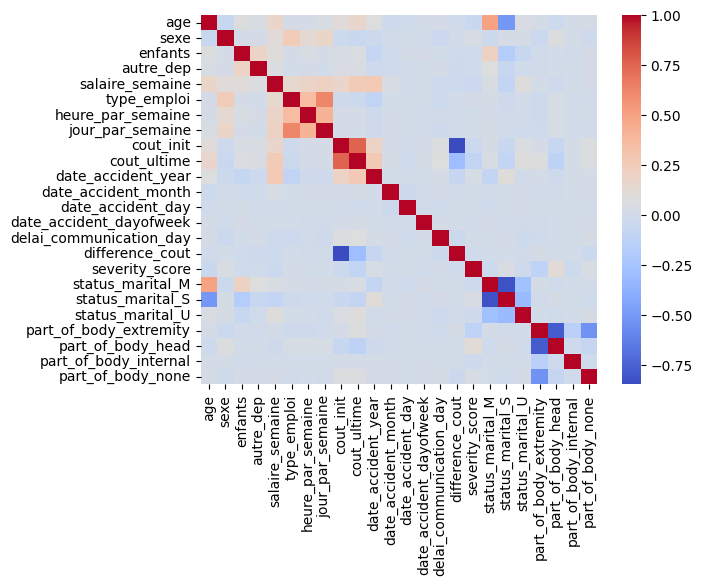

In [74]:
sns.heatmap(data_enc.corr(), cmap='coolwarm')

In [75]:
def categoryHandler(df) :
  """ cette fonction permet de gérer les variables catégorielles à partir d'un dataframe de départ
  elle rassemble en resumé les commandes faites précédemment"""
  # Encodage des variables catégorielles
  data = df.copy()
  data['part_of_body'] = data['description'].apply(body_part_classifier)
  data['severity_score'] = data['description'].apply(severity_scorer)
  data = data.drop(columns='description', axis=1)

  data = data[data['sexe'] != 'U']
  data['type_emploi'] = data['type_emploi'].replace(['F', 'P'], [1, 0])
  data['sexe'] = data['sexe'].replace(['M', 'F'], [1, 0])

  ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

  ohe.fit(data['status_marital'].to_numpy().reshape(-1, 1))

  data_ohe_sm = ohe.transform(data['status_marital'].to_numpy().reshape(-1, 1))

  data_ohe_sm = pd.DataFrame(data_ohe_sm, columns=['status_marital_' + name for name in ohe.categories_[0]])

  ohe.fit(data['part_of_body'].to_numpy().reshape(-1, 1))

  data_ohe_pob = ohe.transform(data['part_of_body'].to_numpy().reshape(-1, 1))

  data_ohe_pob = pd.DataFrame(data_ohe_pob, columns=['part_of_body_' + name for name in ohe.categories_[0]])

  data_enc = pd.concat([data.reset_index(drop=True), data_ohe_sm, data_ohe_pob], axis=1)

  data_enc = data_enc.drop(columns=['status_marital', 'part_of_body'], axis=1)

  return data_enc

**ENTRAINEMENT DU MODELE**

In [76]:
# Séparation de la target

cout_ultime = data_enc['cout_ultime']

data_enc = data_enc.drop(columns=['cout_ultime', 'difference_cout'], axis=1)

In [77]:
data_enc

age  sexe  enfants  autre_dep  salaire_semaine  type_emploi  \
0       31     1        3          3           573.31            1   
1       36     1        0          3           673.00            1   
2       55     1        0          3          1442.31            1   
3       42     1        2          3           610.54            1   
4       34     1        2          3           307.00            1   
...    ...   ...      ...        ...              ...          ...   
43358   50     1        2          0           696.05            1   
43359   32     1        0          0           200.00            1   
43360   30     1        0          0           615.38            1   
43361   40     1        2          0           561.26            1   
43362   30     1        0          0           200.00            1   

       heure_par_semaine  jour_par_semaine  cout_init  date_accident_year  \
0                   42.0                 3       1700                1990   
1                   38.0                 5      35000                2001   
2                   40.0                 5      15000                2000   
3                   40.0                 5       1000                1988   
4                   40.0                 5        630                1988   
...                  ...               ...        ...                 ...   
43358               38.0                 5      11500                1994   
43359               38.0                 5       1000                1996   
43360               38.0                 5       1500                1989   
43361               38.0                 5       9500                2004   
43362               38.0                 5        500                1998   

       ...  date_accident_dayofweek  delai_communication_day  severity_score  \
0      ...                        5                       17       -0.119866   
1      ...                        4                       90       -0.371114   
2      ...                        1                      160       -0.725567   
3      ...                        0                        5        0.018443   
4      ...                        0                        2       -0.066023   
...    ...                      ...                      ...             ...   
43358  ...                        4                       33       -0.541598   
43359  ...                        3                       64       -0.117584   
43360  ...                        1                       27       -0.135750   
43361  ...                        2                        9       -0.752131   
43362  ...                        1                       36       -0.064510   

       status_marital_M  status_marital_S  status_marital_U  \
0                   1.0               0.0               0.0   
1                   1.0               0.0               0.0   
2                   1.0               0.0               0.0   
3                   1.0               0.0               0.0   
4                   1.0               0.0               0.0   
...                 ...               ...               ...   
43358               1.0               0.0               0.0   
43359               0.0               1.0               0.0   
43360               0.0               1.0               0.0   
43361               0.0               1.0               0.0   
43362               0.0               1.0               0.0   

       part_of_body_extremity  part_of_body_head  part_of_body_internal  \
0                         1.0                0.0                    0.0   
1                         1.0                0.0                    0.0   
2                         1.0                0.0                    0.0   
3                         1.0                0.0                    0.0   
4                         1.0                0.0                    0.0   
...                       ...                ...                    ...  

In [106]:
def precision_model(y_test, y_pred):
  sns.scatterplot(x=y_test, y=y_pred)

  # Add the line graph x = y
  # Create data points for the line
  x_line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
  y_line = x_line  # Since x = y

  # Plot the line
  sns.lineplot(x=x_line, y=y_line, color='red', label='x = y')  # Customize color and label

  # Add title and labels if needed
  plt.title('Scatterplot with x = y Line')
  plt.xlabel('y_test')
  plt.ylabel('y_pred')

  # Show the plot
  plt.show()

### Division du jeu de donnée

In [78]:
data_enc_test = data_enc

In [79]:
# Entrainement du modèle

X_train, X_test, y_train, y_test = train_test_split(data_enc_test.to_numpy(), cout_ultime, test_size=0.2, random_state=42)

### Test de différent modèle

In [116]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'Linear': LinearRegression(),
    'Poisson': PoissonRegressor(),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}


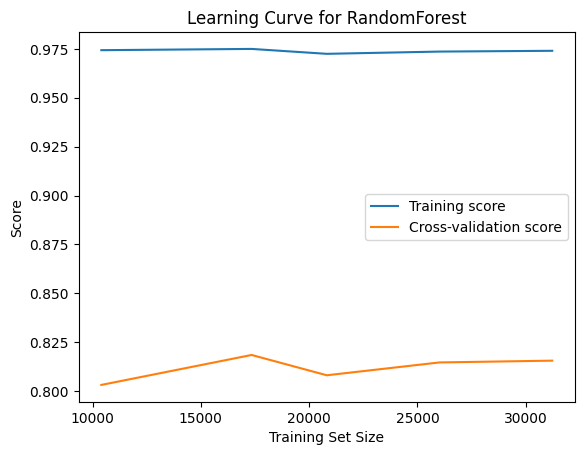

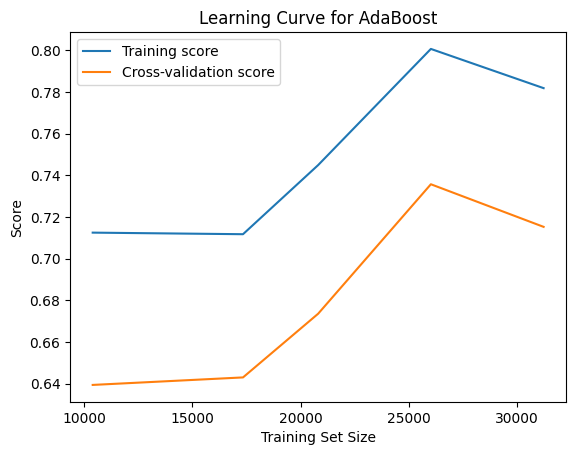

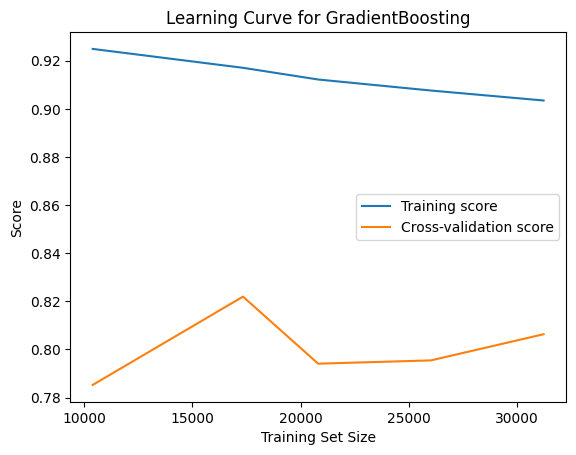

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 6
[LightGBM] [Info] Start training from score 98946.965170
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 10407, number of used features: 21
[LightGBM] [Info] Start training from score 6233.610187
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

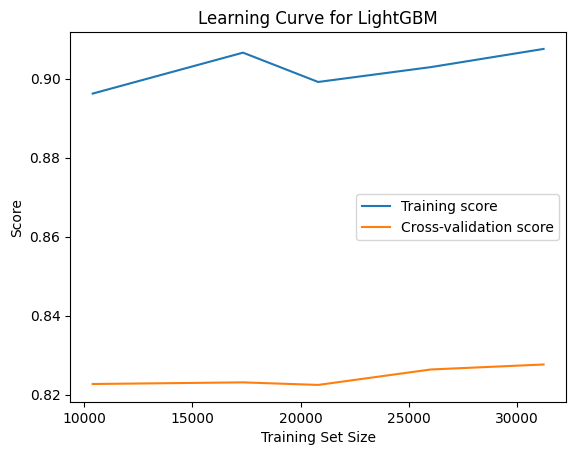

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 6
[LightGBM] [Info] Start training from score 99067.412982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 6
[LightGBM] [Info] Start training from score 98425.798947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 6
[LightGBM] [Info] Start trai

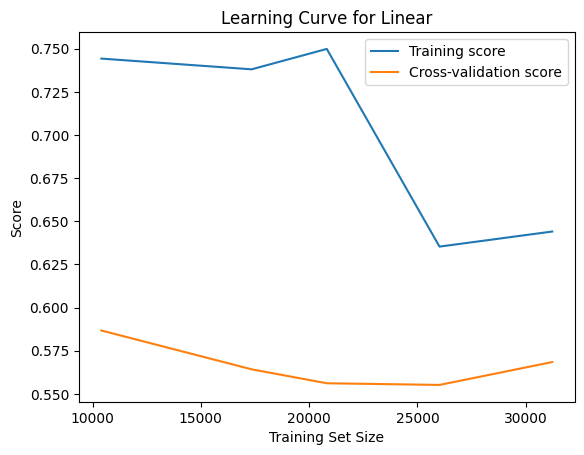

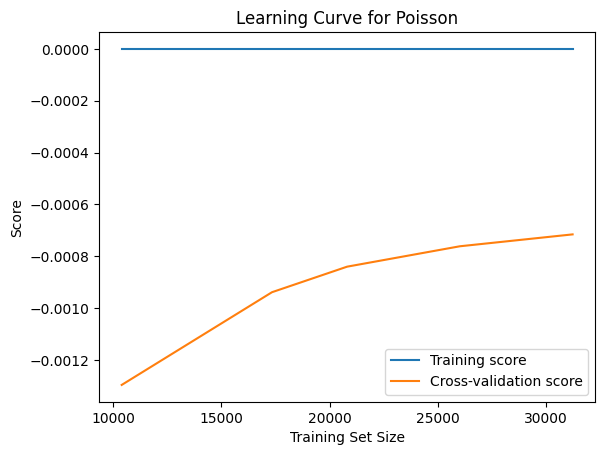

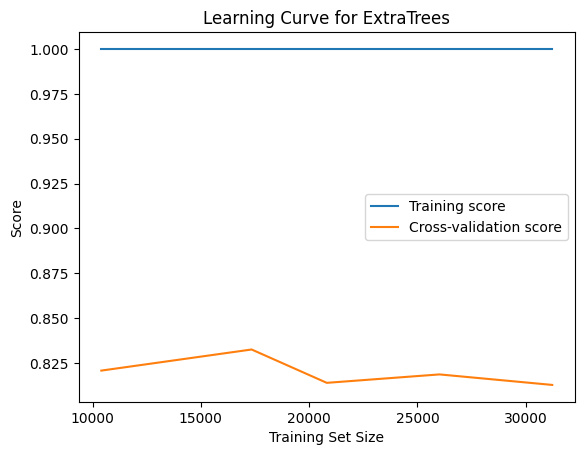

In [117]:
results = {}
inference_times = {}

for model_name, model_obj in models.items():
    pipe = Pipeline(steps=[
        #('preprocessor', preprocessor),
        ('regressor', model_obj)
    ])
    pipe.fit(X_train, y_train)

    # Inference time measurement
    start_time = time.time()
    y_pred = pipe.predict(X_test)
    end_time = time.time()
    inference_time = end_time - start_time
    inference_times[model_name] = inference_time

    train_size_abs, train_scores, test_scores = learning_curve(
      model_obj, data_enc.to_numpy(), cout_ultime, train_sizes=[0.3, 0.5, 0.6, 0.75, 0.9]
    )

    plt.plot(train_size_abs, np.mean(train_scores, axis=1), label="Training score")
    plt.plot(train_size_abs, np.mean(test_scores, axis=1), label="Cross-validation score")
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

    scores = cross_validate(model_obj, X_train, y_train,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error'),
                        return_train_score=True)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = (pipe, rmse, mae, r2, y_pred, scores)

Cette partie correspond à la phase d'entraînement des modèles et détermination des indicateurs clés(temps d'inférence,métriques) pour le choix du modèle approprié.

In [205]:
# Print RMSE results
print("\nModel Performance (RMSE, MAE, R2):")
for model_name, (pipe, rmse, mae, r2, y_pred, scores) in results.items():
    print(f"{model_name}: RMSE = {rmse:.2f} MAE = {mae:.2f} R2 = {r2:.2f}")
    print(pd.DataFrame(scores).round(3))

# Print inference time results
print("\nInference Time Results:")
for model_name, inference_time in inference_times.items():
    print(f"{model_name}: Inference Time = {inference_time:.2f} seconds")


Model Performance (RMSE, MAE, R2):
RandomForest: RMSE = 92348.10 MAE = 53667.48 R2 = -0.38
   fit_time  score_time  test_r2  train_r2  test_neg_mean_squared_error  \
0     0.482       0.013   -1.261     0.890                -1.274877e+10   
1     0.537       0.015   -0.008     0.841                -8.846821e+09   
2     0.509       0.013    0.026     0.874                -4.617938e+10   
3     0.585       0.019   -0.022     0.852                -6.487766e+09   
4     0.584       0.012   -0.169     0.847                -7.654488e+09   

   train_neg_mean_squared_error  test_neg_median_absolute_error  \
0                 -1.904010e+09                      -40070.661   
1                 -2.620738e+09                      -40770.385   
2                 -8.642298e+08                      -39209.439   
3                 -2.529835e+09                      -39235.693   
4                 -2.611250e+09                      -38178.611   

   train_neg_median_absolute_error  test_neg_root_mean

### Choix de hyperparametre avec gridsearchcv

In [86]:
# Définition du modèle de base
gbr = GradientBoostingRegressor(random_state=42)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 4],
    'min_samples_leaf': [1, 3],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
}

# Initialisation de GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,  # Validation croisée à 5 folds
    scoring='neg_mean_squared_error',  # Évaluation basée sur l'erreur quadratique moyenne négative
    n_jobs=-1,  # Utilisation de tous les cœurs disponibles
    verbose=2
)

# Exécution de la recherche
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle entraîné
best_gbr = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs hyperparamètres : {'max_depth': 4, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500}


In [89]:
 # Gradient Boosting

gbr = best_gbr
y_pred = gbr.predict(X_test)

In [90]:
r2_score(y_test, y_pred)

0.7930535506495966

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5112.189629272621

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mae

1789.007061037141

**FEATURE IMPORTANCES avec le modèle du gradientboosting**

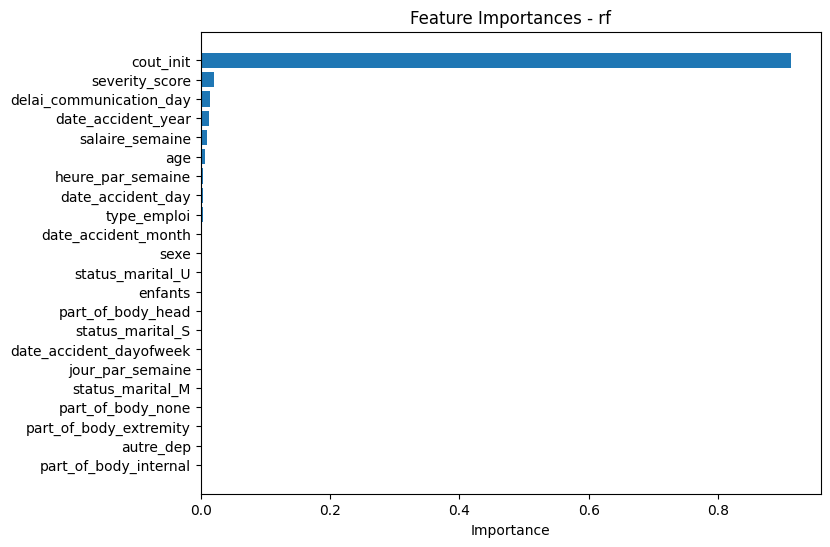

In [88]:
importances = gbr.feature_importances_
sorted_idx = np.argsort(importances)
all_features = data_enc_test.columns.to_list()
plt.figure(figsize=(8,6))
plt.barh([all_features[i] for i in sorted_idx], importances[sorted_idx])
plt.title(f"Feature Importances - {'rf'}")
plt.xlabel("Importance")
plt.show()

On conserve que 6 variables car les autres n'étant pas assez significatives

In [96]:
data_enc_test = data_enc[['cout_init', 'severity_score', 'delai_communication_day', 'date_accident_year', 'salaire_semaine', 'age']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data_enc_test.to_numpy(), cout_ultime, test_size=0.2, random_state=42)

In [99]:
gbr = GradientBoostingRegressor(max_depth= 4, min_samples_leaf= 1, min_weight_fraction_leaf= 0.0, n_estimators= 500)

In [100]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=500)

In [101]:
y_pred = gbr.predict(X_test)

In [102]:
r2_score(y_test, y_pred) #la valeur obtenue prouve que notre modèle explique assez bien l'information dans les données, mais celà ne signifie pas forcément que c'est précis
#Ainsi il faudra regarder d'autres indicateurs en plus.

0.8042046069845105

In [103]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4972.550468444424

In [104]:
mae = mean_absolute_error(y_test, y_pred)
mae

1805.2237226693721

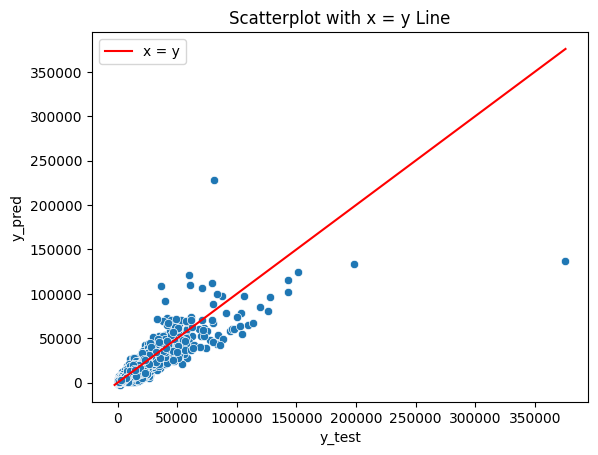

In [107]:
precision_model(y_test, y_pred)

"Y_test" répresente la valeur des coûts ultimes présente dans les données et "Y_pred" la valeur prédite par le modèle.

Nous observons qu'il n'ya pas de dispersions importantes autour de la première bissectrice sauf pour 2 points en particulier.
Celà peut être dû au fait que dans l'analyse, on a pas retiré tous les points qui constituent une différence importante entre "coût initial" et "coût ultime"

 Le modèle fonctionne relativement bien pour les petites valeurs, mais devient moins précis pour les grandes valeurs.


 Il y a une tendance à sous-estimer certaines valeurs réelles.


Certains outliers montrent des erreurs importantes, ce qui peut fausser le RMSE.

In [108]:
# Outliers
#on teste ici le modèle aux valeurs "outliers" pour voir le comportement
#on voit que les indicateurs sont vraiment mauvais
data_outliers_enc = categoryHandler(data_outliers)
cout_ultime_outliers = data_outliers_enc['cout_ultime']
data_outliers_enc = data_outliers_enc[['cout_init', 'severity_score', 'delai_communication_day', 'date_accident_year', 'salaire_semaine', 'age']]
X_train, X_test, y_train, y_test = train_test_split(data_outliers_enc.to_numpy(), cout_ultime_outliers, test_size=0.2, random_state=42)

y_pred_outliers = gbr.predict(X_test)
print('r2 : ',r2_score(y_test, y_pred_outliers))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_outliers))
print('rmse : ',rmse)
mae = mean_absolute_error(y_test, y_pred_outliers)
print('mae : ',mae)

r2 :  -0.8147958991512112
rmse :  105753.82716514834
mae :  77643.51132833453


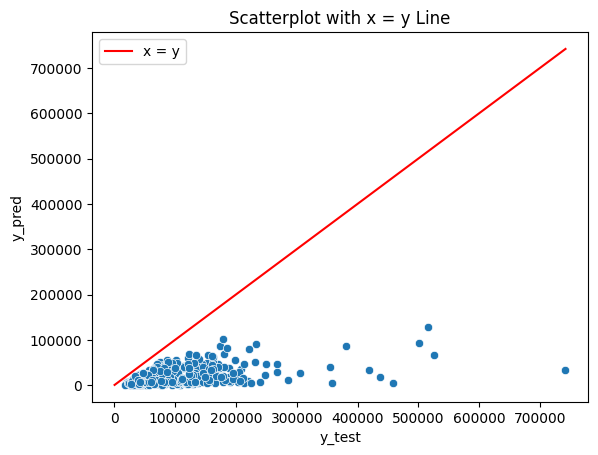

In [109]:
precision_model(y_test, y_pred_outliers)

Le $R^2$ est négatif ce qui peut s'expliquer par le fait que ce modèle a tendance à sous estimer les prédictions pour les valeurs considérées comme outliers.

On va commencer par considérer l'ensemble des modèles suivants, puis après analyse nous déterminerons lequel des modèles est le plus approprié

# Premier modèle - Prédiction directe avec Gradient Boosting

On entraîne un modèle de type Gradientboosting pour la prédiction.

In [140]:
data_enc_test = data_enc[['cout_init', 'salaire_semaine', 'date_accident_year', 'delai_communication_day', 'age', 'severity_score']]

In [141]:
# Entrainement du modèle

X_train, X_test, y_train, y_test = train_test_split(data_enc_test.to_numpy(), cout_ultime, test_size=0.2, random_state=42)

In [142]:
# Random Forest

gbr = GradientBoostingRegressor(n_estimators=500, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4, random_state=42)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=500, random_state=42)

In [152]:
X_true_test = df_test[['cout_init','salaire_semaine']]
X_true_test['date_accident_year'] = pd.to_datetime(df_test['date_accident']).dt.year
X_true_test['delai_communication_day'] = (pd.to_datetime(df_test['date_communication']) - pd.to_datetime(df_test['date_accident'])).dt.days
X_true_test['age'] = df_test[['age']]
X_true_test['severity_score'] = df_test['description'].apply(severity_scorer)

In [153]:
X_true_test

cout_init  salaire_semaine  date_accident_year  delai_communication_day  \
0          9000           528.40                2002                       43   
1          1000           500.00                2003                       26   
2          2000           709.55                2002                       39   
3          5000           500.00                2003                       27   
4          1300           200.00                1996                      184   
...         ...              ...                 ...                      ...   
8321      25000           200.00                2000                       28   
8322       1000           500.00                2002                       16   
8323        210           300.00                1989                       42   
8324        500           257.25                1995                       16   
8325      10000           200.00                2000                       42   

      age  severity_score  
0      26       -0.289655  
1      20        0.044812  
2      46        0.044812  
3      43        0.047259  
4      18       -0.025754  
...   ...             ...  
8321   28        0.116783  
8322   18        0.228897  
8323   34       -0.392775  
8324   35       -0.044630  
8325   44       -0.023721  

[8326 rows x 6 columns]

In [154]:
y_true_pred = gbr.predict(X_true_test)

In [158]:
df_export_final = df_test.copy()
df_export_final['Y'] = y_true_pred

In [159]:
df_export_final

Identifiant         date_accident    date_communication  age sexe  \
0       W1000000  2002-04-29T19:00:00Z  2002-06-12T00:00:00Z   26    M   
1       W1000001  2003-12-08T15:00:00Z  2004-01-04T00:00:00Z   20    M   
2       W1000002  2002-12-19T15:00:00Z  2003-01-28T00:00:00Z   46    M   
3       W1000003  2003-05-20T11:00:00Z  2003-06-17T00:00:00Z   43    M   
4       W1000004  1996-02-09T15:00:00Z  1996-08-12T00:00:00Z   18    F   
...          ...                   ...                   ...  ...  ...   
8321    W1008321  2000-01-11T15:00:00Z  2000-02-09T00:00:00Z   28    M   
8322    W1008322  2002-11-29T09:00:00Z  2002-12-16T00:00:00Z   18    M   
8323    W1008323  1989-01-11T16:00:00Z  1989-02-23T00:00:00Z   34    F   
8324    W1008324  1995-12-08T16:00:00Z  1995-12-25T00:00:00Z   35    F   
8325    W1008325  2000-08-08T12:00:00Z  2000-09-20T00:00:00Z   44    M   

     status_marital  enfants  autre_dep  salaire_semaine  patrimoine  \
0                 S        0          0           528.40      279101   
1                 S        0          0           500.00       82053   
2                 S        0          0           709.55       35549   
3                 S        0          0           500.00      705850   
4                 S        0          0           200.00      961486   
...             ...      ...        ...              ...         ...   
8321              S        0          0           200.00      642720   
8322              S        0          0           500.00      183221   
8323              S        0          0           300.00      623288   
8324              S        0          0           257.25      857221   
8325              M        0          0           200.00      449861   

     type_emploi  heure_par_semaine  jour_par_semaine  \
0              F               40.0                 5   
1              F               38.0                 5   
2              F               35.0                 5   
3              F               38.0                 5   
4              P               20.0                 3   
...          ...                ...               ...   
8321           F               38.0                 5   
8322           F               40.0                 5   
8323           F               38.0                 5   
8324           F               23.5                 5   
8325           F               40.0                 5   

                                            description  cout_init  \
0     MOTOR VEHICLE ACCIDENT ACCIDENT LIGHT POLE AND...       9000   
1                   STRUCK METAL FOREIGN BODY RIGHT EYE       1000   
2              PARTICLE METAL FOREIGN BODY RIGHT CORNEA       2000   
3                    PLAYING VOLLEY BALL BROKEN BIG TOE       5000   
4         STRUCK WITH KNIFE LACERATION LEFT RING FINGER       1300   
...                                                 ...        ...   
8321         STRUCK BOX LEFT ELBOW FRACTURED LEFT THUMB      25000   
8322         CHEMICAL SPLASH CHEMICAL BURNING RIGHT EYE       1000   
8323         FELL OVER ONTO ARM BRUISED LOWER BACK PAIN        210   
8324                DRILL JAMMED FRACTURED RIGHT FINGER        500   
8325                  LOWER BACK PAIN LOWER BACK STRAIN      10000   

                 Y  
0      7919.136872  
1       853.286101  
2      3014.718449  
3      6840.273653  
4      1114.753401  
...            ...  
8321  19309.578510  
8322    992.885292  
8323    906.113622  
8324    943.116767  
8325   7212.054377  

[8326 rows x 16 columns]

In [160]:
df_export_final.to_excel('test.xlsx', index=False)

# Second modèle (composition - Modèle Classification/Régression) - Optionnel

On entraîne un modèle de type Randomforest pour la classification et Gradientboosting pour la prédiction.
L'objectif étant de classifier un individu en fonction de sa marge (difference de cout). On identifie deux classes, celle que l'on appelera la classe des outliers (avec des marges assez importantes) et l'autre classe considérée comme normale.

In [127]:
# Classification des individus en fonction de l'importance de la différence de coûts
#0 correspond aux individus avec une différence de coûts pas très importante et
#1 correspond à ceux avec une différence significativement importante


In [161]:
A = data_enc[['cout_init', 'salaire_semaine', 'date_accident_year', 'delai_communication_day', 'age', 'severity_score']]
A['outliers'] = 0

In [162]:
B = data_outliers_enc[['cout_init', 'salaire_semaine', 'date_accident_year', 'delai_communication_day', 'age', 'severity_score']]
B['outliers'] = 1

In [163]:
A_B = pd.concat([A, B])

In [164]:
A_B

cout_init  salaire_semaine  date_accident_year  delai_communication_day  \
0          1700           573.31                1990                       17   
1         35000           673.00                2001                       90   
2         15000          1442.31                2000                      160   
3          1000           610.54                1988                        5   
4           630           307.00                1988                        2   
...         ...              ...                 ...                      ...   
2278      30000           552.50                2005                       13   
2279       3300           434.00                1990                       15   
2280      20000           561.20                2003                       19   
2281       7000           550.00                1995                       13   
2282      25000           584.40                2003                       14   

      age  severity_score  outliers  
0      31       -0.119866         0  
1      36       -0.371114         0  
2      55       -0.725567         0  
3      42        0.018443         0  
4      34       -0.066023         0  
...   ...             ...       ...  
2278   50       -0.075302         1  
2279   21       -0.465060         1  
2280   30       -0.099121         1  
2281   38       -0.487674         1  
2282   23       -0.120515         1  

[45646 rows x 7 columns]

Ici on va entraîner un autre modèle qui nous permettra de réaliser notre classification.

In [165]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [166]:
X_train, X_test, y_train, y_test = train_test_split(A_B.drop(columns='outliers', axis=1), A_B['outliers'], test_size=0.2)

In [167]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [168]:
y_pred = rfc.predict(X_test)
proba = rfc.predict_proba(X_test)[:, 1]

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8665
           1       0.33      0.01      0.01       465

    accuracy                           0.95      9130
   macro avg       0.64      0.50      0.49      9130
weighted avg       0.92      0.95      0.92      9130



Le modèle est très précis pour la classe 0 (95%), mais très mauvais pour la classe 1 (33%).

In [170]:
print(confusion_matrix(y_test, y_pred))

[[8659    6]
 [ 462    3]]


Le modèle prédit presque tout en "0" car la classe 0 est largement majoritaire.

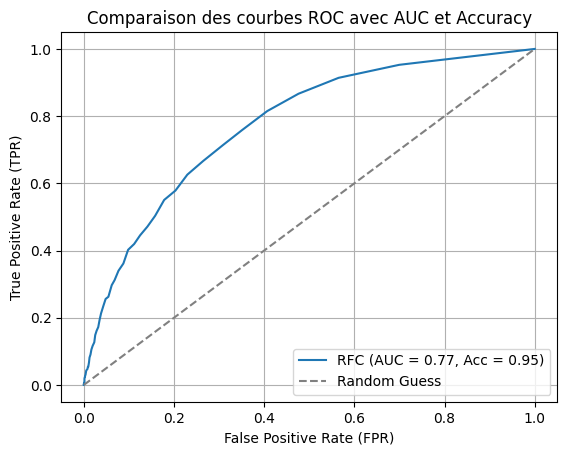

In [171]:
# Courbe AUC - ROC

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, proba, pos_label=1)
roc_auc = roc_auc_score(y_test, proba)
accuracy = accuracy_score(y_test, y_pred)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label=f'RFC (AUC = {roc_auc:.2f}, Acc = {accuracy:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comparaison des courbes ROC avec AUC et Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

On observe que:  
Le modèle est meilleur que le hasard (AUC = 0.77) mais loin d’être optimal.  
Il manque de capacité à bien détecter la classe 1.

### Entrainenement du modèle

In [172]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(A_B.drop(columns='outliers', axis=1), A_B['outliers'], test_size=0.2)

In [173]:
X_train_c

cout_init  salaire_semaine  date_accident_year  \
23080        615           980.00                1992   
26276       1000           500.00                2003   
14537       9500           430.20                1991   
38064        880           460.40                1993   
23712       2000           540.00                2000   
...          ...              ...                 ...   
1187       28500           759.37                2004   
40250        100           251.68                1993   
21904       1000           500.00                2003   
19398        500           529.00                2000   
5881        1000           500.00                2003   

       delai_communication_day  age  severity_score  
23080                       28   51       -0.526100  
26276                       21   24        0.008093  
14537                       34   21       -0.249676  
38064                        7   34       -0.472187  
23712                       16   38        0.059604  
...                        ...  ...             ...  
1187                        22   36        0.011499  
40250                       37   52       -0.156360  
21904                       13   21        0.078435  
19398                       22   43        0.137824  
5881                        50   23       -0.625732  

[36516 rows x 6 columns]

In [174]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_c, y_train_c)

RandomForestClassifier(random_state=42)

In [177]:
data_c = df_test[['cout_init','salaire_semaine']]
data_c['date_accident_year'] = pd.to_datetime(df_test['date_accident']).dt.year
data_c['delai_communication_day'] = (pd.to_datetime(df_test['date_communication']) - pd.to_datetime(df_test['date_accident'])).dt.days
data_c['age'] = df_test[['age']]
data_c['severity_score'] = df_test['description'].apply(severity_scorer)

In [178]:
y_pred_c = rfc.predict(data_c)
proba_c = rfc.predict_proba(data_c)[:, 1]

In [179]:
outliers = data_c[y_pred_c == 1]
non_outliers = data_c[y_pred_c == 0]

In [180]:
outliers

cout_init  salaire_semaine  date_accident_year  delai_communication_day  \
246       40000          1184.17                2005                       24   
872       25740           516.42                2005                        9   
1466      17000           875.50                2005                       21   
1704      17000          1411.83                2002                       21   
1946      27000           646.00                2005                        8   
3560      50000           617.94                2004                       18   
4224      50000           588.56                2003                       61   
4886      58350           646.00                2005                       24   
5129     145000           608.00                2001                       33   
7078      25000           525.92                2005                       20   

      age  severity_score  
246    47       -0.575624  
872    49       -0.458385  
1466   58       -0.610497  
1704   52       -0.005291  
1946   49       -0.541598  
3560   54        0.460587  
4224   48        0.542780  
4886   50        0.509833  
5129   44        0.142152  
7078   50       -0.157263

In [184]:
data_enc_c_0 = data_enc[['cout_init', 'salaire_semaine', 'date_accident_year', 'delai_communication_day', 'age', 'severity_score']]
X_train_c_0, X_test_c_0, y_train_c_0, y_test_c_0 = train_test_split(data_enc_c_0, cout_ultime, test_size=0.2, random_state=42)

In [185]:
gbr0 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, random_state=42)
gbr0.fit(X_train_c_0, y_train_c_0)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000,
                          random_state=42)

In [186]:
y_predict_0 = gbr0.predict(non_outliers)

In [187]:
non_outliers['cout_ultime'] = y_predict_0

In [188]:
data_enc_c_1 = data_outliers_enc[['cout_init', 'salaire_semaine', 'date_accident_year', 'delai_communication_day', 'age', 'severity_score']]
X_train_c_1, X_test_c_1, y_train_c_1, y_test_c_1 = train_test_split(data_enc_c_1, data_outliers['cout_ultime'], test_size=0.2, random_state=42)

In [189]:
gbr1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, random_state=42)
gbr1.fit(X_train_c_1, y_train_c_1)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000,
                          random_state=42)

In [190]:
y_predict_1 = gbr1.predict(outliers)

In [191]:
outliers['cout_ultime'] = y_predict_1

In [192]:
data_final = pd.concat([non_outliers, outliers], axis=0).sort_index()

In [193]:
y = data_final['cout_ultime']
data_final = df_test.copy()

In [194]:
data_final['Y'] = y

In [195]:
data_final # Avec la seconde méthode pas retenu

Identifiant         date_accident    date_communication  age sexe  \
0       W1000000  2002-04-29T19:00:00Z  2002-06-12T00:00:00Z   26    M   
1       W1000001  2003-12-08T15:00:00Z  2004-01-04T00:00:00Z   20    M   
2       W1000002  2002-12-19T15:00:00Z  2003-01-28T00:00:00Z   46    M   
3       W1000003  2003-05-20T11:00:00Z  2003-06-17T00:00:00Z   43    M   
4       W1000004  1996-02-09T15:00:00Z  1996-08-12T00:00:00Z   18    F   
...          ...                   ...                   ...  ...  ...   
8321    W1008321  2000-01-11T15:00:00Z  2000-02-09T00:00:00Z   28    M   
8322    W1008322  2002-11-29T09:00:00Z  2002-12-16T00:00:00Z   18    M   
8323    W1008323  1989-01-11T16:00:00Z  1989-02-23T00:00:00Z   34    F   
8324    W1008324  1995-12-08T16:00:00Z  1995-12-25T00:00:00Z   35    F   
8325    W1008325  2000-08-08T12:00:00Z  2000-09-20T00:00:00Z   44    M   

     status_marital  enfants  autre_dep  salaire_semaine  patrimoine  \
0                 S        0          0           528.40      279101   
1                 S        0          0           500.00       82053   
2                 S        0          0           709.55       35549   
3                 S        0          0           500.00      705850   
4                 S        0          0           200.00      961486   
...             ...      ...        ...              ...         ...   
8321              S        0          0           200.00      642720   
8322              S        0          0           500.00      183221   
8323              S        0          0           300.00      623288   
8324              S        0          0           257.25      857221   
8325              M        0          0           200.00      449861   

     type_emploi  heure_par_semaine  jour_par_semaine  \
0              F               40.0                 5   
1              F               38.0                 5   
2              F               35.0                 5   
3              F               38.0                 5   
4              P               20.0                 3   
...          ...                ...               ...   
8321           F               38.0                 5   
8322           F               40.0                 5   
8323           F               38.0                 5   
8324           F               23.5                 5   
8325           F               40.0                 5   

                                            description  cout_init  \
0     MOTOR VEHICLE ACCIDENT ACCIDENT LIGHT POLE AND...       9000   
1                   STRUCK METAL FOREIGN BODY RIGHT EYE       1000   
2              PARTICLE METAL FOREIGN BODY RIGHT CORNEA       2000   
3                    PLAYING VOLLEY BALL BROKEN BIG TOE       5000   
4         STRUCK WITH KNIFE LACERATION LEFT RING FINGER       1300   
...                                                 ...        ...   
8321         STRUCK BOX LEFT ELBOW FRACTURED LEFT THUMB      25000   
8322         CHEMICAL SPLASH CHEMICAL BURNING RIGHT EYE       1000   
8323         FELL OVER ONTO ARM BRUISED LOWER BACK PAIN        210   
8324                DRILL JAMMED FRACTURED RIGHT FINGER        500   
8325                  LOWER BACK PAIN LOWER BACK STRAIN      10000   

                 Y  
0      7471.120349  
1       900.550557  
2      3415.264046  
3      6506.498186  
4      1120.983317  
...            ...  
8321  20029.964372  
8322    920.073135  
8323   1049.109652  
8324   1082.788128  
8325   7304.170022  

[8326 rows x 16 columns]